## EDA

The main purpose of this notebook is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, find interesting relations among the variables.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\\..\\data\\normalized\\apartment_dataset.csv')

In [3]:
df.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,price_unit,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,tỷ,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,tỷ,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,tỷ,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,tỷ,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,tỷ,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24942 entries, 0 to 24941
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duAn           17463 non-null  object 
 1   huong          2420 non-null   object 
 2   phapLy         4901 non-null   object 
 3   noBed          23070 non-null  float64
 4   soLau          4950 non-null   float64
 5   Street         16393 non-null  object 
 6   Precinct       20100 non-null  object 
 7   District       24748 non-null  object 
 8   City           24942 non-null  object 
 9   acreage_value  24613 non-null  float64
 10  acreage_unit   24942 non-null  object 
 11  price_value    21752 non-null  float64
 12  price_unit     24942 non-null  object 
 13  noBathroom     13790 non-null  float64
dtypes: float64(5), object(9)
memory usage: 2.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
noBed,23070.0,2.627568,1.920705,1.0,2.0,3.0,3.0,100.0
soLau,4950.0,9.113535,9.428359,1.0,1.0,6.0,15.0,108.0
acreage_value,24613.0,112.035785,1803.036140,0.0,68.0,85.0,110.0,200000.0
price_value,21752.0,1796.305045,94658.482896,0.0,3.5,4.8,6.8,6650000.0
noBathroom,13790.0,1.987092,0.592193,1.0,2.0,2.0,2.0,17.0


In [6]:
continuous_features = ['noBed', 'soLau', 'acreage_value', 'price_value', 'noBathroom']
categorical_features = [feature for feature in df.columns if feature not in continuous_features]
print(continuous_features)
print(categorical_features)

['noBed', 'soLau', 'acreage_value', 'price_value', 'noBathroom']
['duAn', 'huong', 'phapLy', 'Street', 'Precinct', 'District', 'City', 'acreage_unit', 'price_unit']


In [7]:
df_categorical = df[categorical_features]

In [8]:
duAn_counts = df['duAn'].value_counts().reset_index()
duAn_counts.columns = ['duAn', 'Frequency']
duAn_counts['Percentage'] = (duAn_counts['Frequency'] / len(df)) * 100

# Display the result
print(duAn_counts)

                            duAn  Frequency  Percentage
0    Vinhomes Ocean Park Gia Lâm        435    1.744046
1            Vinhomes Smart City        296    1.186753
2            Vinhomes Ocean Park        210    0.841953
3                  Goldmark City        184    0.737711
4       Hà Nội Melody Residences        180    0.721674
..                           ...        ...         ...
988                  95 Cầu Giấy          1    0.004009
989         Chung cư 379 Đội Cấn          1    0.004009
990                  Garden City          1    0.004009
991           Sài Đồng Lake View          1    0.004009
992              ParkCity Hà Nội          1    0.004009

[993 rows x 3 columns]


In [9]:
huong_counts = df['huong'].value_counts().reset_index()
huong_counts.columns = ['huong', 'Frequency']
huong_counts['Percentage'] = (huong_counts['Frequency'] / len(df)) * 100

# Display the result
print(huong_counts)

      huong  Frequency  Percentage
0       Nam        494    1.980595
1      Đông        420    1.683907
2       Bắc        373    1.495469
3       Tây        356    1.427311
4  Đông Nam        340    1.363163
5  Đông Bắc        186    0.745730
6   Tây Nam        133    0.533237
7   Tây Bắc        118    0.473098


In [10]:
Street_counts = df['Street'].value_counts().reset_index()
Street_counts.columns = ['Street', 'Frequency']
Street_counts['Percentage'] = (Street_counts['Frequency'] / len(df)) * 100

# Display the result
print(Street_counts)

                                Street  Frequency  Percentage
0                         Đường Tố Hữu       1225    4.911394
1                      Đường Phạm Hùng        483    1.936493
2                  Đường Phạm Văn Đồng        392    1.571646
3                   Đường Lê Văn Lương        388    1.555609
4                      Đường Minh Khai        356    1.427311
..                                 ...        ...         ...
708             Đường 23B Xã Đại Thịnh          1    0.004009
709  Đường ĐT 427B Thị trấn Thường Tín          1    0.004009
710                Đường Trần Hữu Tước          1    0.004009
711                          Đường 442          1    0.004009
712                  Đường Long Biên 2          1    0.004009

[713 rows x 3 columns]


In [11]:
Precinct_counts = df['Precinct'].value_counts().reset_index()
Precinct_counts.columns = ['Precinct', 'Frequency']
Precinct_counts['Percentage'] = (Precinct_counts['Frequency'] / len(df)) * 100

# Display the result
print(Precinct_counts)

                 Precinct  Frequency  Percentage
0        Phường Mỹ Đình 2        879    3.524176
1        Phường Trung Hòa        827    3.315692
2             Xã Dương Xá        712    2.854623
3       Phường Nhân Chính        690    2.766418
4        Phường Mỹ Đình 1        689    2.762409
..                    ...        ...         ...
211         Xã Thụy Hương          1    0.004009
212  Phường Trần Hưng Đạo          1    0.004009
213       Phường Hàng Bài          1    0.004009
214       Phường Cát Linh          1    0.004009
215            Xã Sài Sơn          1    0.004009

[216 rows x 3 columns]


In [12]:
District_counts = df['District'].value_counts().reset_index()
District_counts.columns = ['District', 'Frequency']
District_counts['Percentage'] = (District_counts['Frequency'] / len(df)) * 100

# Display the result
print(District_counts)

               District  Frequency  Percentage
0      Quận Nam Từ Liêm       5048   20.238954
1         Quận Cầu Giấy       3174   12.725523
2          Quận Hà Đông       3097   12.416807
3        Quận Hoàng Mai       2481    9.947077
4       Quận Thanh Xuân       2292    9.189319
5      Quận Bắc Từ Liêm       1432    5.741320
6         Huyện Gia Lâm       1296    5.196055
7          Quận Đống Đa       1106    4.434288
8        Quận Long Biên       1070    4.289953
9           Quận Tây Hồ        982    3.937134
10    Quận Hai Bà Trưng        925    3.708604
11         Quận Ba Đình        627    2.513832
12      Huyện Thanh Trì        427    1.711972
13       Huyện Hoài Đức        393    1.575656
14       Huyện Đông Anh        176    0.705637
15       Quận Hoàn Kiếm         90    0.360837
16     Huyện Đan Phượng         74    0.296688
17     Huyện Thạch Thất         19    0.076177
18      Huyện Thanh Oai         15    0.060140
19      Huyện Chương Mỹ          6    0.024056
20        Huy

C:\Users\FPT Shop\AppData\Local\Temp\ipykernel_11108\3897997324.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_duAn_counts.values, y=top_duAn_counts.index, palette="viridis")


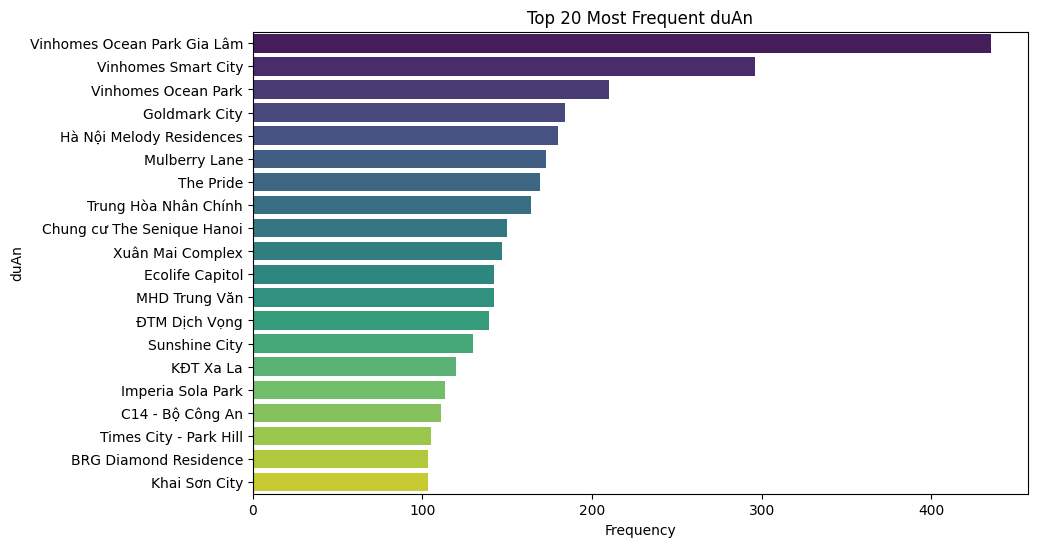

In [13]:
duAn_counts = df['duAn'].value_counts()

### Option 1: Plot the Top N Most Frequent 'duAn'
top_n = 20  # choose the top N most frequent
top_duAn_counts = duAn_counts.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_duAn_counts.values, y=top_duAn_counts.index, palette="viridis")
plt.xlabel('Frequency')
plt.ylabel('duAn')
plt.title(f'Top {top_n} Most Frequent duAn')
plt.show()

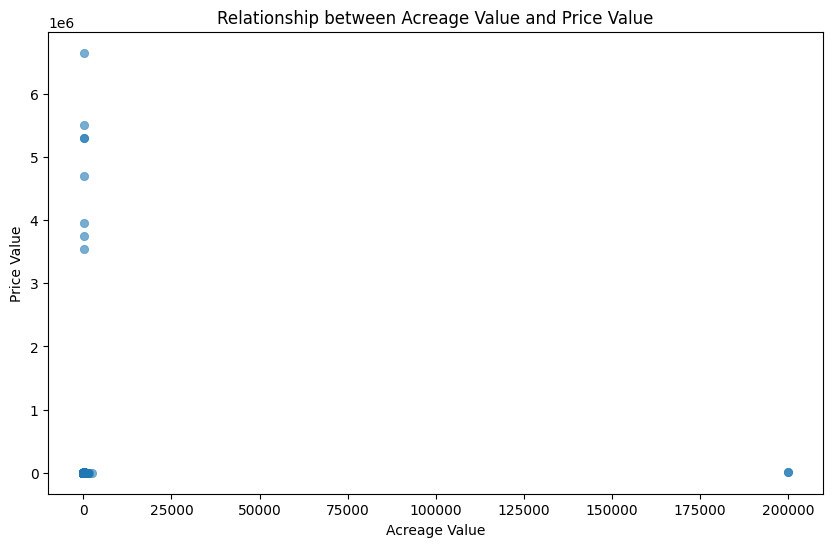

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value')
plt.show()

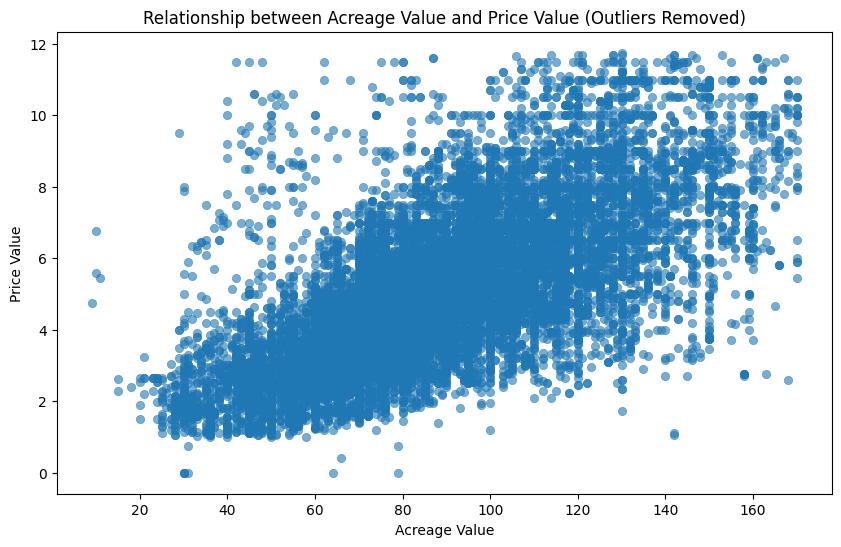

In [15]:
df_clean = df.dropna(subset=['price_value', 'acreage_value'])

# Calculate IQR to remove outliers
Q1_price = df_clean['price_value'].quantile(0.25)
Q3_price = df_clean['price_value'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_acreage = df_clean['acreage_value'].quantile(0.25)
Q3_acreage = df_clean['acreage_value'].quantile(0.75)
IQR_acreage = Q3_acreage - Q1_acreage

# Define bounds to filter out outliers
price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price

acreage_lower_bound = Q1_acreage - 1.5 * IQR_acreage
acreage_upper_bound = Q3_acreage + 1.5 * IQR_acreage

# Filter out outliers
df_filtered = df_clean[(df_clean['price_value'] >= price_lower_bound) & 
                       (df_clean['price_value'] <= price_upper_bound) & 
                       (df_clean['acreage_value'] >= acreage_lower_bound) & 
                       (df_clean['acreage_value'] <= acreage_upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

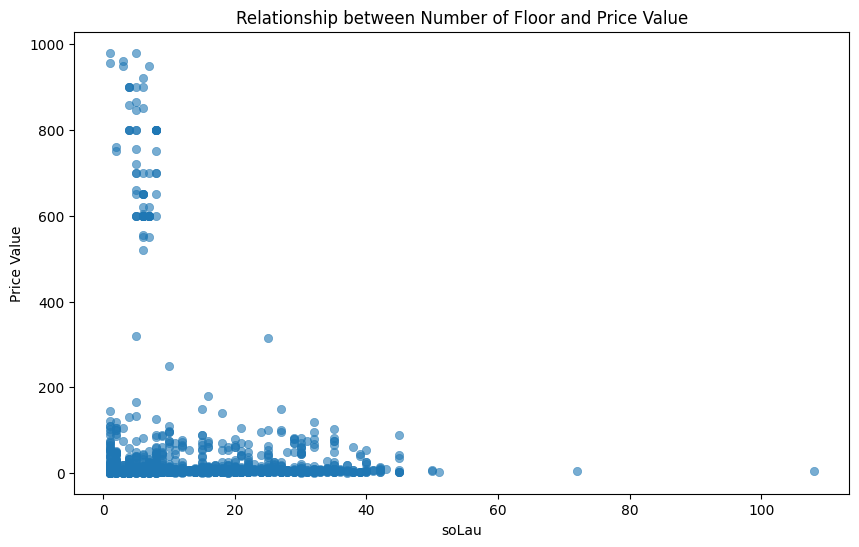

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='soLau', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('soLau')
plt.ylabel('Price Value')
plt.title('Relationship between Number of Floor and Price Value')
plt.show()

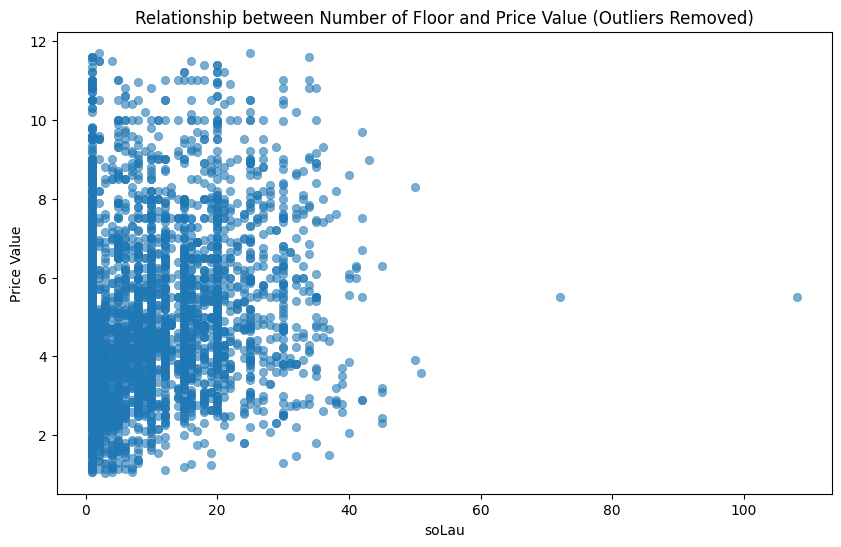

In [17]:
df_clean = df.dropna(subset=['price_value', 'acreage_value'])

# Calculate IQR to remove outliers
Q1_price = df_clean['price_value'].quantile(0.25)
Q3_price = df_clean['price_value'].quantile(0.75)
IQR_price = Q3_price - Q1_price


# Define bounds to filter out outliers
price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price


# Filter out outliers
df_filtered = df_clean[(df_clean['price_value'] >= price_lower_bound) & 
                       (df_clean['price_value'] <= price_upper_bound)]
                       

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='soLau', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('soLau')
plt.ylabel('Price Value')
plt.title('Relationship between Number of Floor and Price Value (Outliers Removed)')
plt.show()

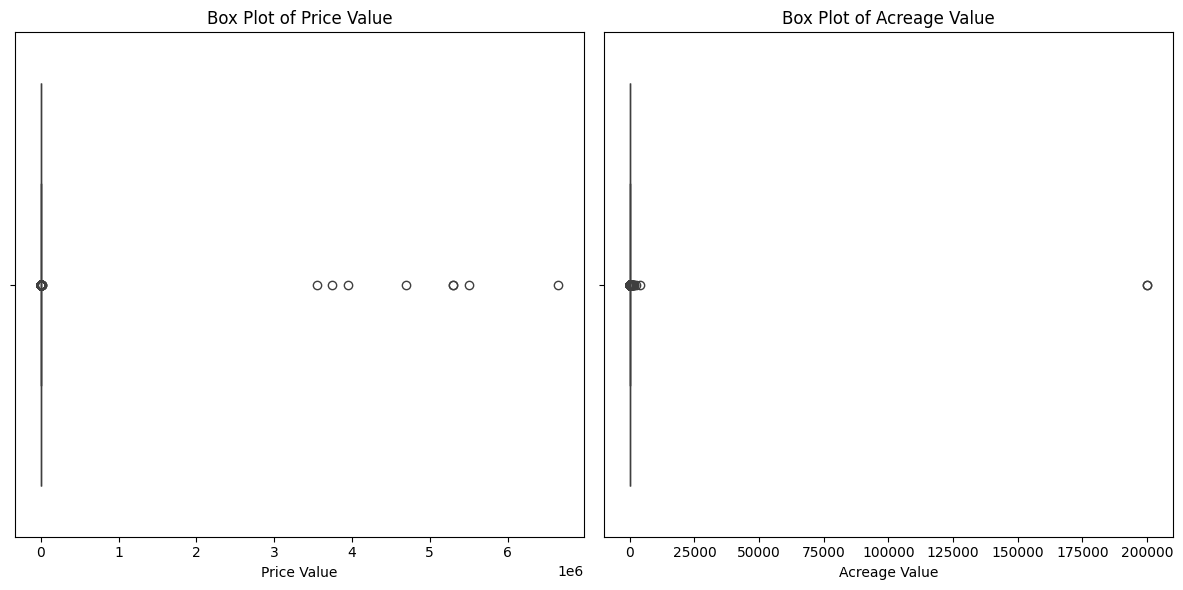

In [18]:
plt.figure(figsize=(12, 6))

# Box plot for price_value
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(data=df, x='price_value')
plt.xlabel('Price Value')
plt.title('Box Plot of Price Value')

# Box plot for acreage_value
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='acreage_value')
plt.xlabel('Acreage Value')
plt.title('Box Plot of Acreage Value')

# Display the plots
plt.tight_layout()
plt.show()

## Processing data
Cột price_value:
- loại bỏ null + giá trị = 0
- chuyển đơn vị về giá tỷ đồng -> các cột tương ứng có đơn vị là triệu ở cột price_unit chuyển về tỷ -> drop cột price unit
- loại bỏ outlier

Cột acreage_unit: bỏ

Cột value: Loại bỏ outlier

Cột city: bỏ

Cột district: nếu không có district bỏ luôn

In [19]:
df_clean = df.copy()
df_clean.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,price_unit,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,tỷ,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,tỷ,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,tỷ,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,tỷ,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,tỷ,NaN


#### price_value: remove 0s and null values


In [20]:
df_clean = df_clean[(df_clean['price_value'].notnull()) & (df_clean['price_value'] != 0)]

# Display the number of rows remaining
print(f"Number of rows after cleaning: {df_clean.shape[0]}")

Number of rows after cleaning: 21746


#### price_value: convert then drop price_unit (now only contains 'billion')

In [21]:
df_clean.loc[df_clean['price_unit'] == 'triệu', 'price_value'] /= 1000

# Drop the price_unit column
df_clean = df_clean.drop(columns=['price_unit'])

In [22]:
df_clean.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,NaN


In [23]:
# df_clean.to_csv("test_data.csv", index=False)

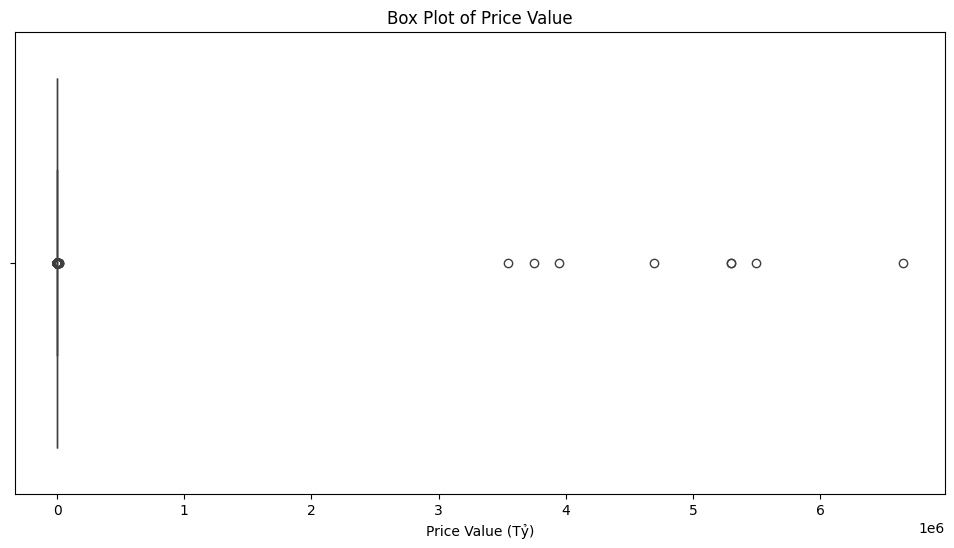

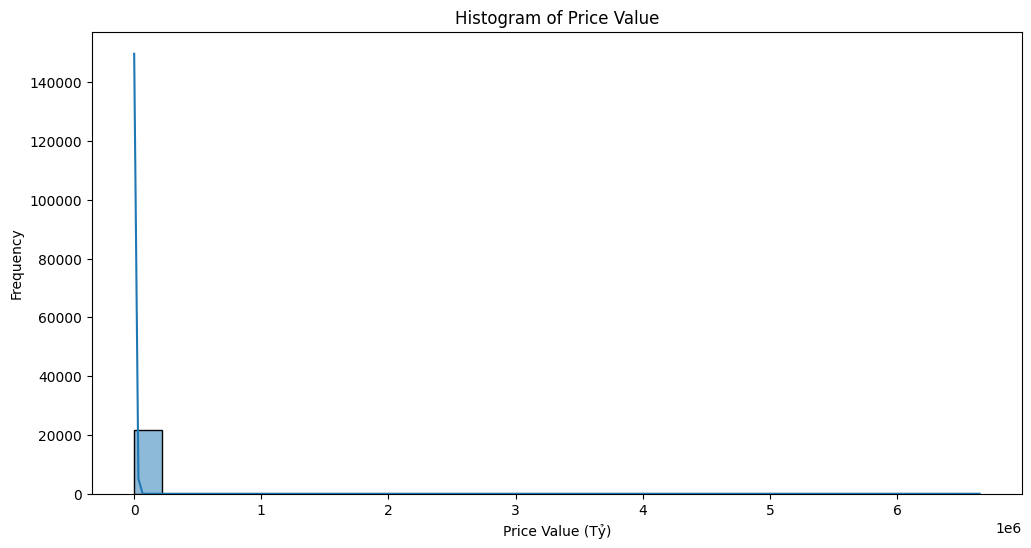

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='price_value')
plt.title('Box Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='price_value', kde=True, bins=30)
plt.title('Histogram of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.ylabel('Frequency')
plt.show()

In [25]:
price_value_counts = df_clean['price_value'].value_counts().head(10)

# Convert to a DataFrame for better readability
top_price_values = price_value_counts.reset_index()
top_price_values.columns = ['price_value', 'frequency']

# Display the top values with their frequencies
print("Top Price Values with Frequency:")
print(top_price_values)

Top Price Values with Frequency:
   price_value  frequency
0          4.5        399
1          5.0        396
2          5.5        385
3          4.0        380
4          6.0        377
5          6.5        349
6          3.5        327
7          4.2        295
8          7.0        265
9          3.0        263


In [26]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=False).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top Largest Price Values with Frequency:")
print(top_price_values_df)

Top Largest Price Values with Frequency:
    price_value  frequency
0     6650000.0          1
1     5500000.0          1
2     5300000.0          2
3     4695000.0          1
4     3950000.0          1
5     3750000.0          1
6     3550000.0          1
7       14000.0          1
8       13800.0          1
9       13600.0          1
10       8250.0          1
11       7689.0          1
12       6900.0          1
13       6450.0          1
14       6200.0          1
15       6000.0          1
16       5400.0          1
17       5200.0          1
18       4800.0          1
19       4050.0          1


In [27]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=True).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top smallest Price Values with Frequency:")
print(top_price_values_df)

Top smallest Price Values with Frequency:
    price_value  frequency
0       0.00040          1
1       0.00074          1
2       0.00075          1
3       0.00110          1
4       0.00156          1
5       0.00228          1
6       0.00250          3
7       0.00260          1
8       0.00265          1
9       0.00270          2
10      0.00277          2
11      0.00300          1
12      0.00340          1
13      0.00360          1
14      0.00368          1
15      0.00385          1
16      0.00439          1
17      0.00458          1
18      0.00480          1
19      0.00495          1


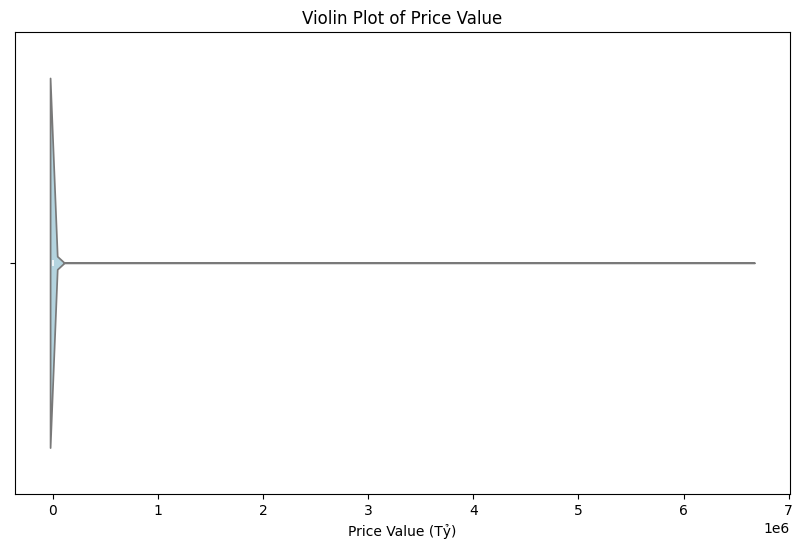

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_clean, x='price_value', color='lightblue')
plt.title('Violin Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

In [29]:
df_price = df_clean[df_clean['price_value'] <= 100]
print(f"Number of rows after cleaning: {df_price.shape[0]}")

Number of rows after cleaning: 21689


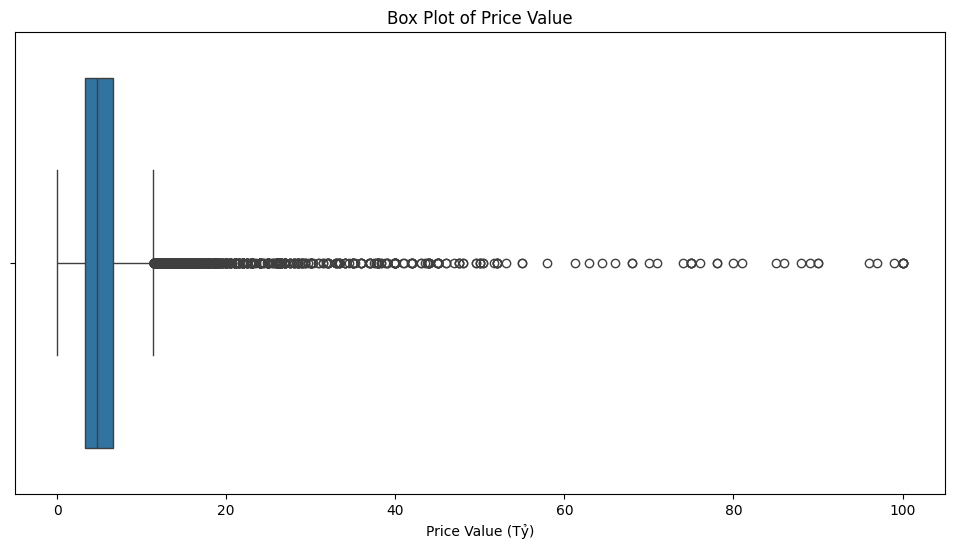

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_price, x='price_value')
plt.title('Box Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

In [31]:
Q1 = df_clean['price_value'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_clean['price_value'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                          # Interquartile range

# Define the lower and upper bounds
lower_bound = 0.1
upper_bound = Q3 + 1.09 * IQR

print(lower_bound, upper_bound)
# Remove rows with outliers
df_no_outliers = df_clean[(df_clean['price_value'] >= lower_bound) & (df_clean['price_value'] <= upper_bound)]

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_clean)}")

0.1 10.1425
Number of rows before removing outliers: 24942
Number of rows after removing outliers: 21746


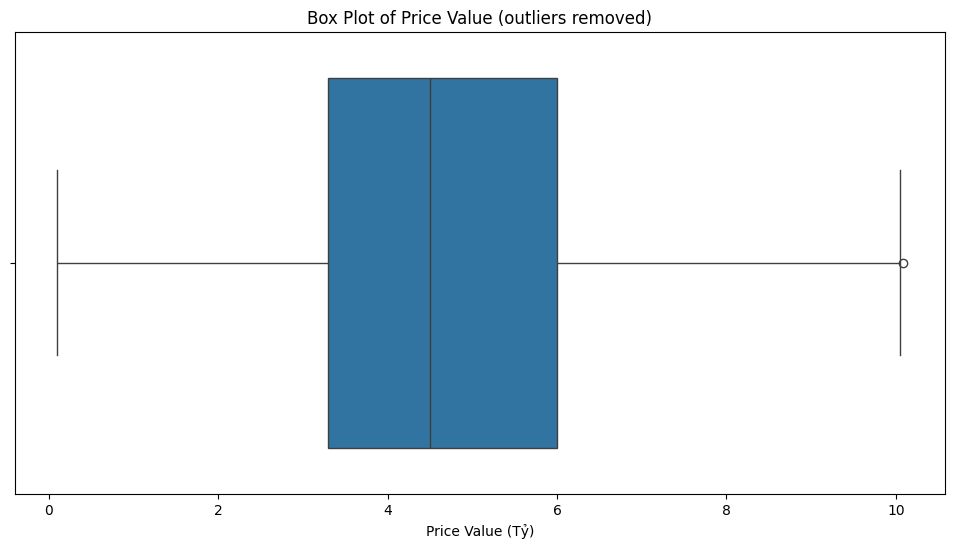

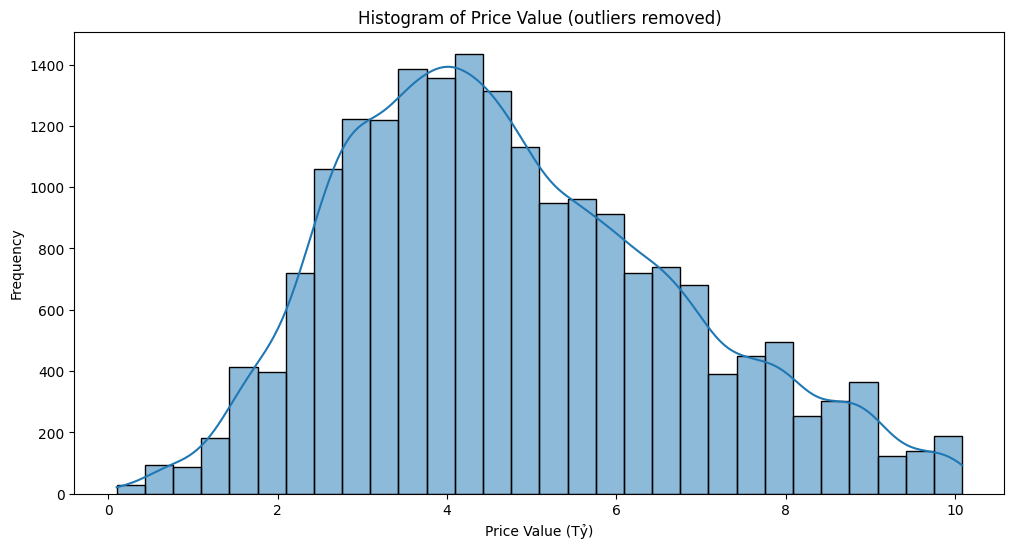

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='price_value')
plt.title('Box Plot of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='price_value', kde=True, bins=30)
plt.title('Histogram of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.ylabel('Frequency')
plt.show()

In [33]:
price_value_counts = df_no_outliers['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=False).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top Largest Price Values with Frequency:")
print(top_price_values_df)

Top Largest Price Values with Frequency:
    price_value  frequency
0         10.08          1
1         10.05          2
2         10.03          1
3         10.00        124
4          9.99          1
5          9.97          2
6          9.95          1
7          9.90         17
8          9.86          1
9          9.85          3
10         9.84          1
11         9.81          1
12         9.80         28
13         9.78          1
14         9.76          1
15         9.75          4
16         9.72          1
17         9.70         21
18         9.68          3
19         9.65          4


In [34]:
# df_final = df_no_outliers.copy()

### acreage_value

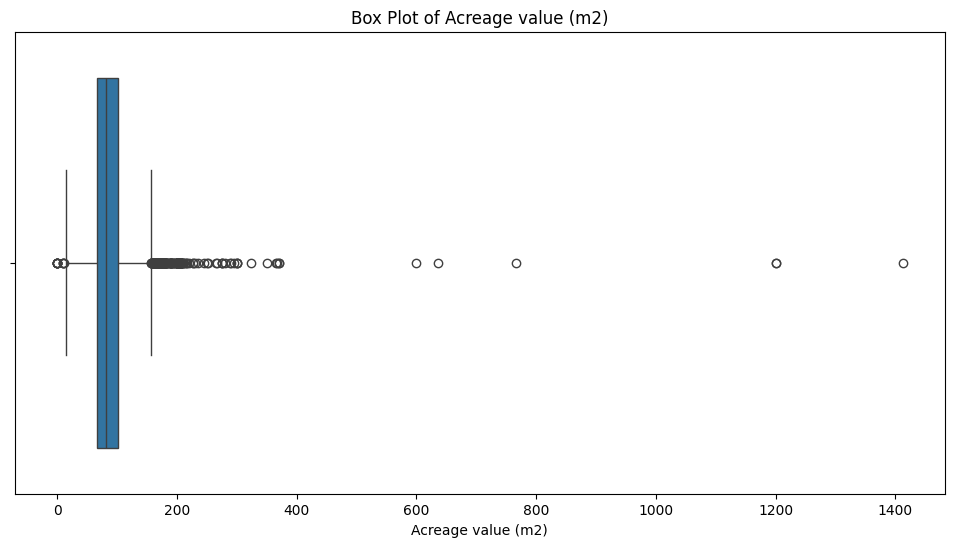

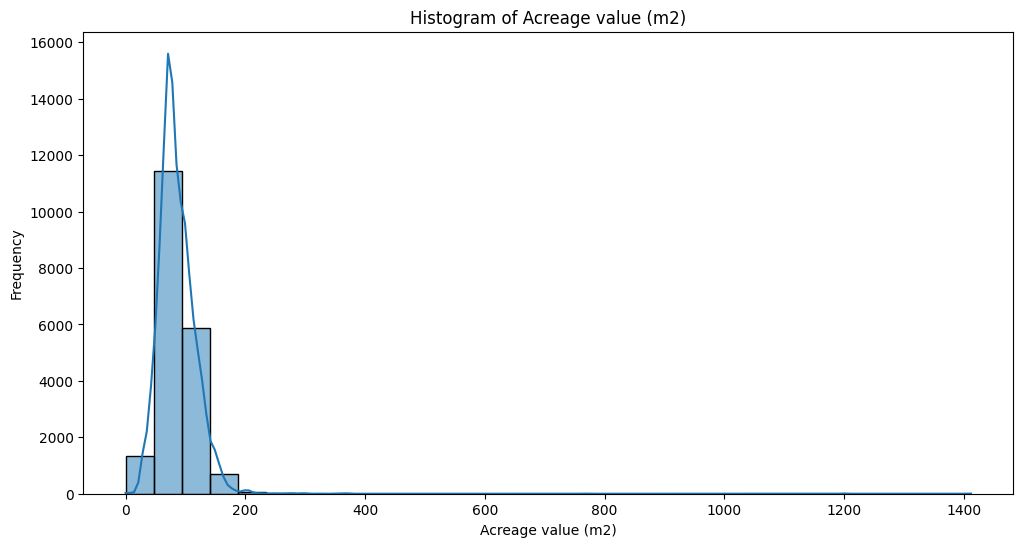

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='acreage_value')
plt.title('Box Plot of Acreage value (m2)')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='acreage_value', kde=True, bins=30)
plt.title('Histogram of Acreage value (m2)')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

In [36]:
Q1_a = df_no_outliers['acreage_value'].quantile(0.25)  # First quartile (25th percentile)
Q3_a = df_no_outliers['acreage_value'].quantile(0.75)  # Third quartile (75th percentile)
IQR_a = Q3_a - Q1_a                          # Interquartile range

# Define the lower and upper bounds
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

print(lower_bound_a, upper_bound_a)
# Remove rows with outliers
df_no_outliers = df_no_outliers[(df_no_outliers['acreage_value'] >= lower_bound_a) & (df_no_outliers['acreage_value'] <= upper_bound_a)]

# Display the number of rows before and after removing outliers
# print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

12.0 156.0
Number of rows after removing outliers: 19114


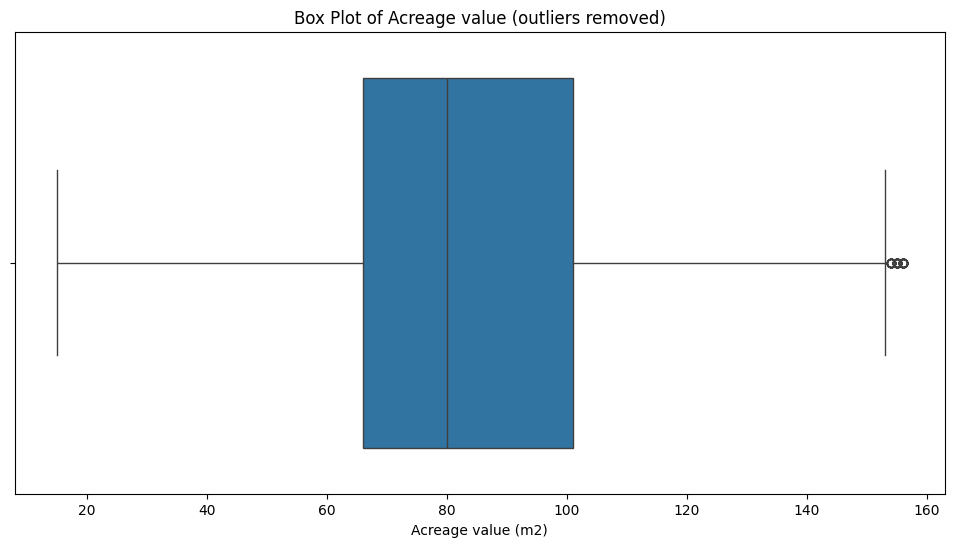

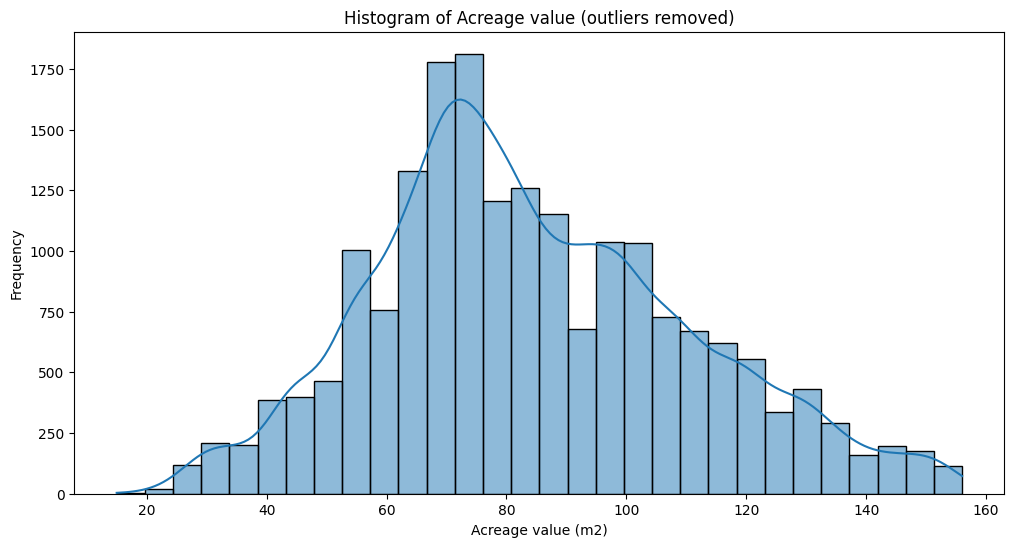

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='acreage_value')
plt.title('Box Plot of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='acreage_value', kde=True, bins=30)
plt.title('Histogram of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

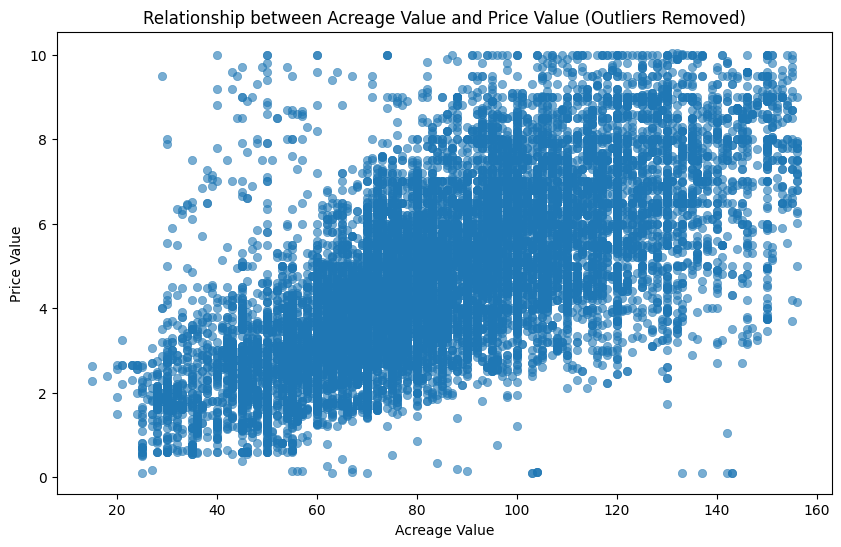

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

#### drop acreage_unit

In [39]:
acreage_unit_counts = df_no_outliers['acreage_unit'].value_counts()

# Display the result
print("Unique values in acreage_unit and their counts:")
print(acreage_unit_counts)

Unique values in acreage_unit and their counts:
acreage_unit
m2    19114
Name: count, dtype: int64


In [40]:
df_no_outliers = df_no_outliers.drop(columns=['acreage_unit'])

In [41]:
City_unit_counts = df_no_outliers['City'].value_counts()

# Display the result
print("Unique values in acreage_unit and their counts:")
print(City_unit_counts)

Unique values in acreage_unit and their counts:
City
Hà Nội    19114
Name: count, dtype: int64


In [42]:
df_no_outliers = df_no_outliers.drop(columns=['City'])

In [43]:
df_no_outliers.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,acreage_value,price_value,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,68.0,3.72,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,52.0,1.28,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,75.0,4.80,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,31.0,3.00,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,28.0,2.15,NaN


#### check if any of District is missing

In [44]:
dist_null = df_no_outliers['District'].isnull().sum()
dist_null


np.int64(132)

In [45]:
df_no_outliers = df_no_outliers.dropna(subset=['District'])
df_no_outliers.shape[0]

18982

In [46]:
dist_null = df_no_outliers['District'].isnull().sum()
dist_null

np.int64(0)

In [47]:
filtered_df = df_no_outliers[(df_no_outliers['price_value'] < 1) & (df_no_outliers['acreage_value'] > 80)]

# Display the filtered DataFrame
print(filtered_df[['price_value', 'acreage_value']])

       price_value  acreage_value
3322         0.768           96.0
4671         0.102          137.0
6664         0.100          142.0
7261         0.140           90.0
7274         0.180           88.0
10960        0.123          104.0
13654        0.100          103.0
13744        0.100          103.0
21133        0.100          133.0
22547        0.330           84.0


In [48]:
df_no_outliers = df_no_outliers[~((df_no_outliers['price_value'] < 1) & (df_no_outliers['acreage_value'] > 80))]

In [49]:
df_no_outliers = df_no_outliers[~((df_no_outliers['price_value'] > 8) & (df_no_outliers['acreage_value'] < 50))]

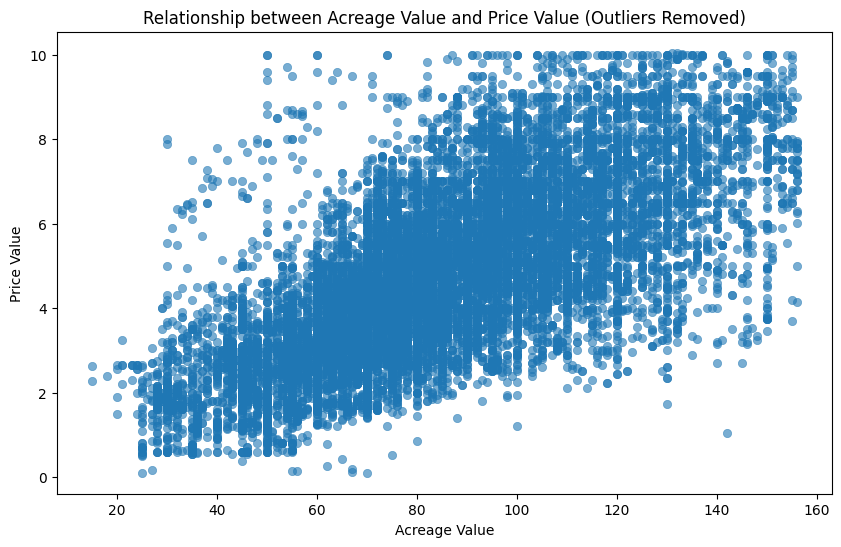

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

In [51]:
df_no_outliers.shape[0]

18956

### check for noBed outliers

In [52]:
def remove_outliers(group, column):
    Q1 = group[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = group[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                      # Interquartile range
    lower_bound = Q1 - 1.5 * IQR       # Lower bound
    upper_bound = Q3 + 1.5 * IQR       # Upper bound
    return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]

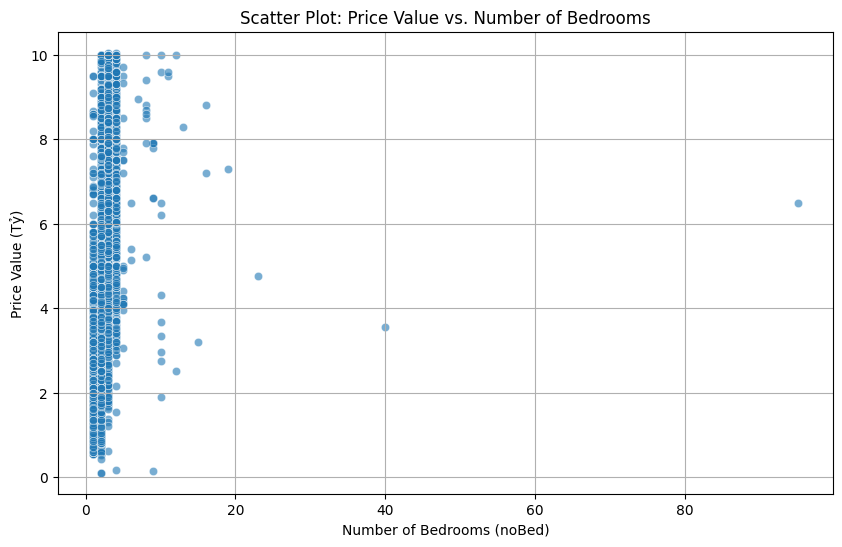

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='noBed', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms (noBed)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

In [54]:
Q1_a = df_no_outliers['noBed'].quantile(0.25)  # First quartile (25th percentile)
Q3_a = df_no_outliers['noBed'].quantile(0.75)  # Third quartile (75th percentile)
IQR_a = Q3_a - Q1_a                          # Interquartile range

# Define the lower and upper bounds
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

print(lower_bound_a, upper_bound_a)

0.5 4.5


In [55]:
df_no_outliers = df_no_outliers[~(df_no_outliers['noBed'] > 5)]

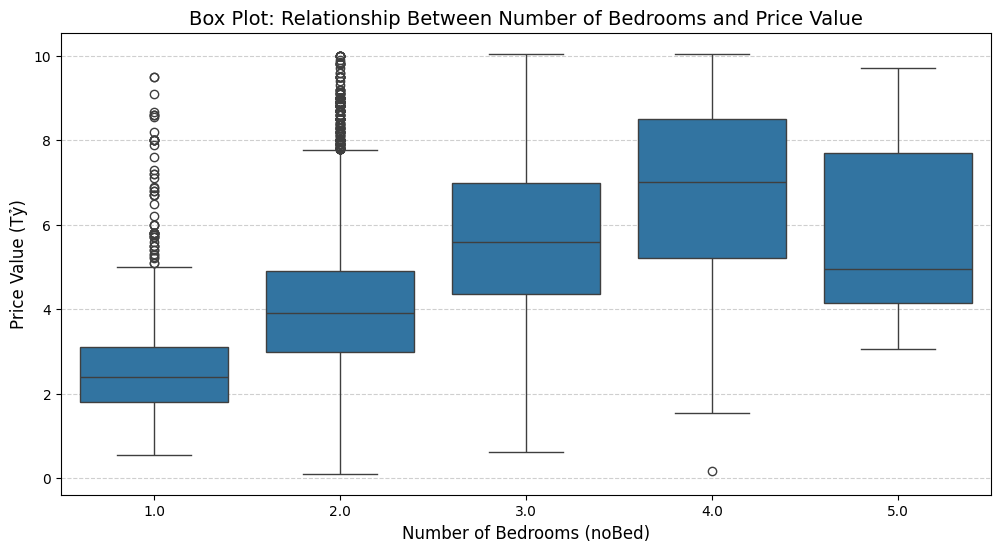

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='noBed', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Bedrooms and Price Value', fontsize=14)
plt.xlabel('Number of Bedrooms (noBed)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [57]:
df_no_rm = df_no_outliers.groupby('noBed').apply(remove_outliers, column='price_value').reset_index(drop=True)

C:\Users\FPT Shop\AppData\Local\Temp\ipykernel_11108\762433346.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_rm = df_no_outliers.groupby('noBed').apply(remove_outliers, column='price_value').reset_index(drop=True)


In [58]:
df_no_rm.shape[0]

17481

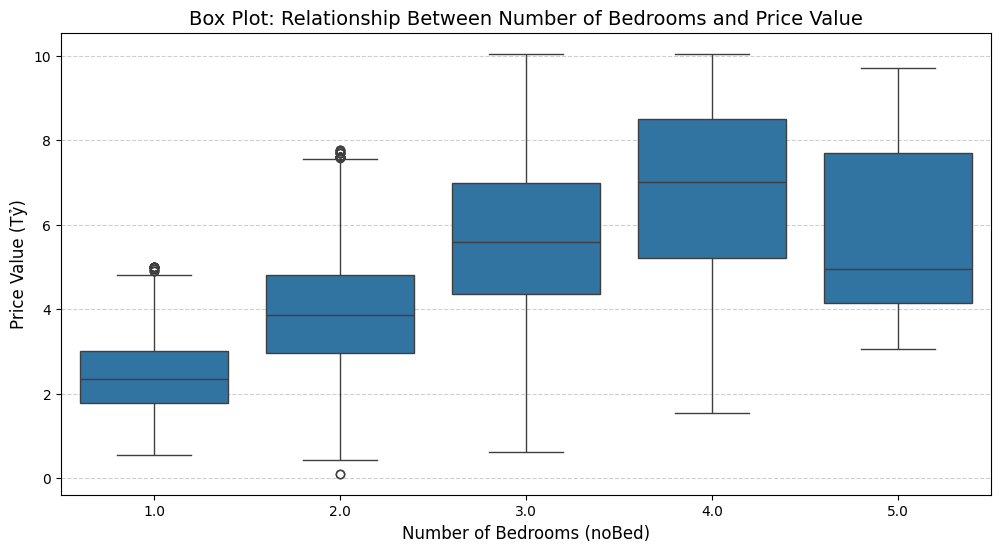

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_rm, x='noBed', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Bedrooms and Price Value', fontsize=14)
plt.xlabel('Number of Bedrooms (noBed)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [60]:
#df_no_outliers = df_no_outliers.groupby('noBed').apply(remove_outliers, column='price_value').reset_index(drop=True)

In [61]:
df_no_outliers = df_no_outliers[~((df_no_outliers['noBed'] == 1) & (df_no_outliers['price_value'] > 5))]
df_no_outliers = df_no_outliers[~((df_no_outliers['noBed'] == 2) & (df_no_outliers['price_value'] > 7.9))]

### check for soLau outliers

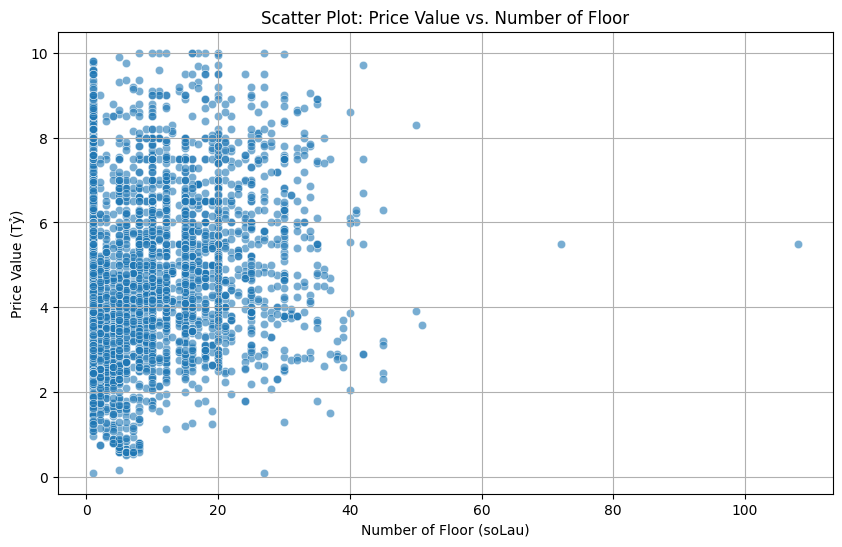

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='soLau', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Floor')
plt.xlabel('Number of Floor (soLau)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

In [63]:
Q1_a = df_no_outliers['soLau'].quantile(0.25)  # First quartile (25th percentile)
Q3_a = df_no_outliers['soLau'].quantile(0.75)  # Third quartile (75th percentile)
IQR_a = Q3_a - Q1_a                          # Interquartile range

# Define the lower and upper bounds
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

print(lower_bound_a, upper_bound_a)

-20.0 36.0


In [64]:
df_no_outliers = df_no_outliers[~(df_no_outliers['soLau'] > 36)]

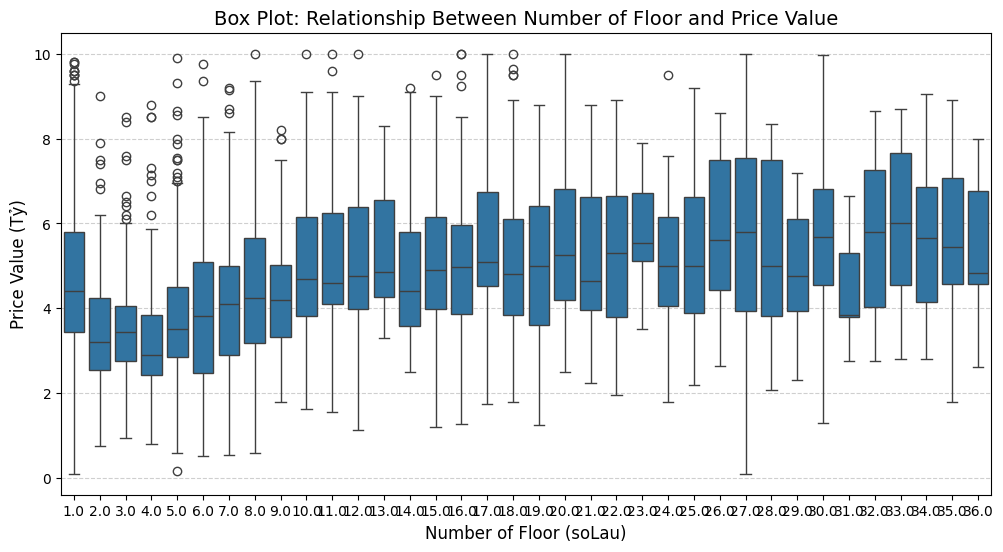

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='soLau', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Floor and Price Value', fontsize=14)
plt.xlabel('Number of Floor (soLau)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [66]:
df_no_rm_lau = df_no_outliers.groupby('soLau').apply(remove_outliers, column='price_value').reset_index(drop=True)

C:\Users\FPT Shop\AppData\Local\Temp\ipykernel_11108\3883046962.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_rm_lau = df_no_outliers.groupby('soLau').apply(remove_outliers, column='price_value').reset_index(drop=True)


In [67]:
df_no_rm_lau.shape[0]

4045

### check for noBathroom outliers

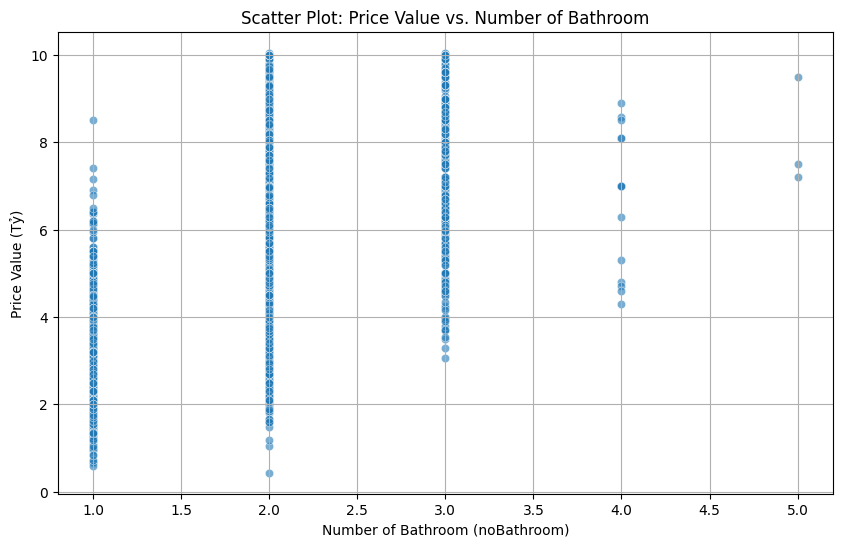

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='noBathroom', y='price_value', alpha=0.6)
plt.title('Scatter Plot: Price Value vs. Number of Bathroom')
plt.xlabel('Number of Bathroom (noBathroom)')
plt.ylabel('Price Value (Tỷ)')
plt.grid(True)
plt.show()

In [69]:
Q1_a = df_no_outliers['noBathroom'].quantile(0.25)  # First quartile (25th percentile)
Q3_a = df_no_outliers['noBathroom'].quantile(0.75)  # Third quartile (75th percentile)
IQR_a = Q3_a - Q1_a                          # Interquartile range

# Define the lower and upper bounds
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

print(lower_bound_a, upper_bound_a)

2.0 2.0


In [70]:
df_no_outliers = df_no_outliers[~(df_no_outliers['noBathroom'] > 3)]

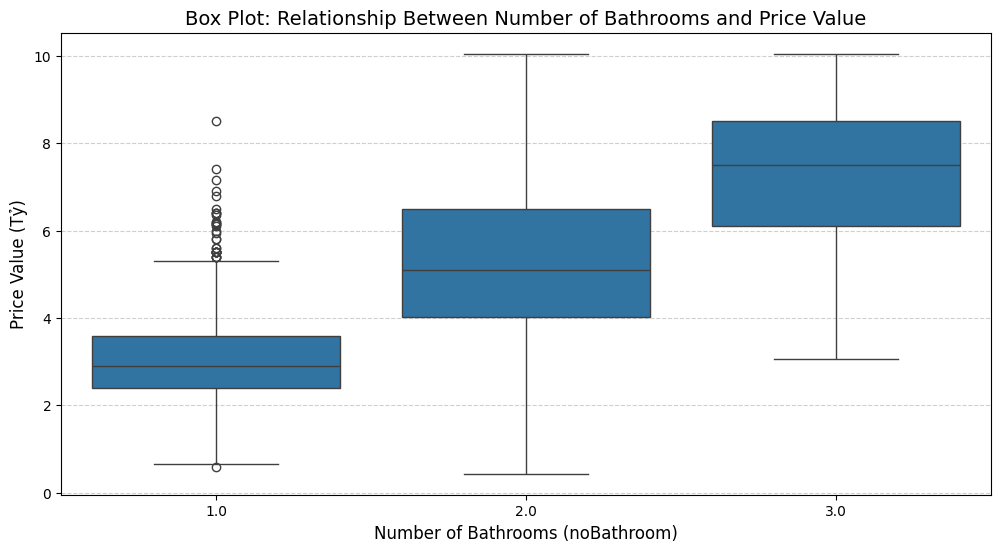

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='noBathroom', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Bathrooms and Price Value', fontsize=14)
plt.xlabel('Number of Bathrooms (noBathroom)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [72]:
df_no_rm_bath = df_no_outliers.groupby('noBathroom').apply(remove_outliers, column='price_value').reset_index(drop=True)

C:\Users\FPT Shop\AppData\Local\Temp\ipykernel_11108\3809352850.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_rm_bath = df_no_outliers.groupby('noBathroom').apply(remove_outliers, column='price_value').reset_index(drop=True)


In [73]:
df_no_rm_bath.shape[0]

9979

In [74]:
filtered_samples = df_no_outliers[~((df_no_outliers['noBathroom'] == 1) & (df_no_outliers['price_value'] > 5.35))]

# Count the number of samples
count_samples = filtered_samples.shape[0]
print(count_samples)

18591


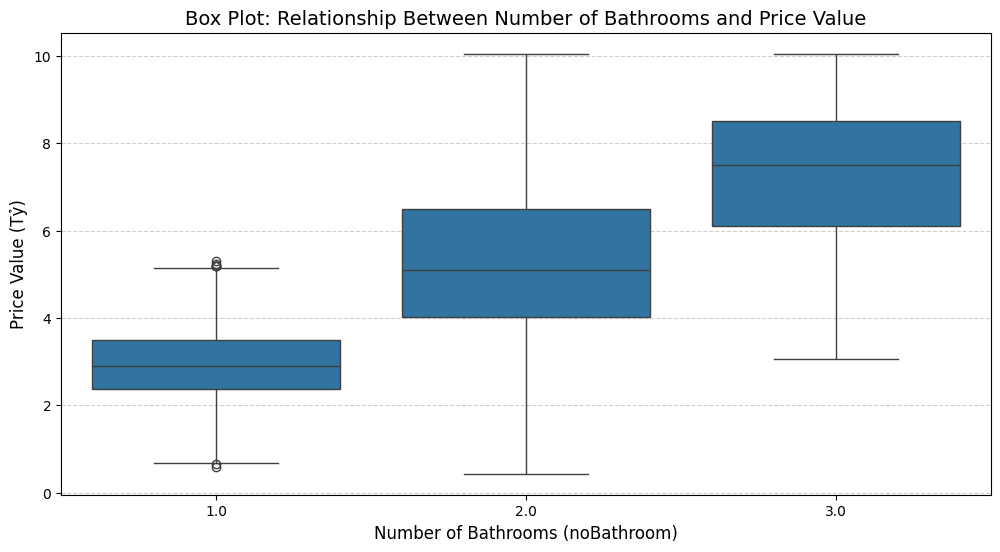

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_samples, x='noBathroom', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Bathrooms and Price Value', fontsize=14)
plt.xlabel('Number of Bathrooms (noBathroom)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [76]:
df_no_outliers = df_no_outliers[~((df_no_outliers['noBathroom'] == 1) & (df_no_outliers['price_value'] > 5.35))]

### District vs price_value

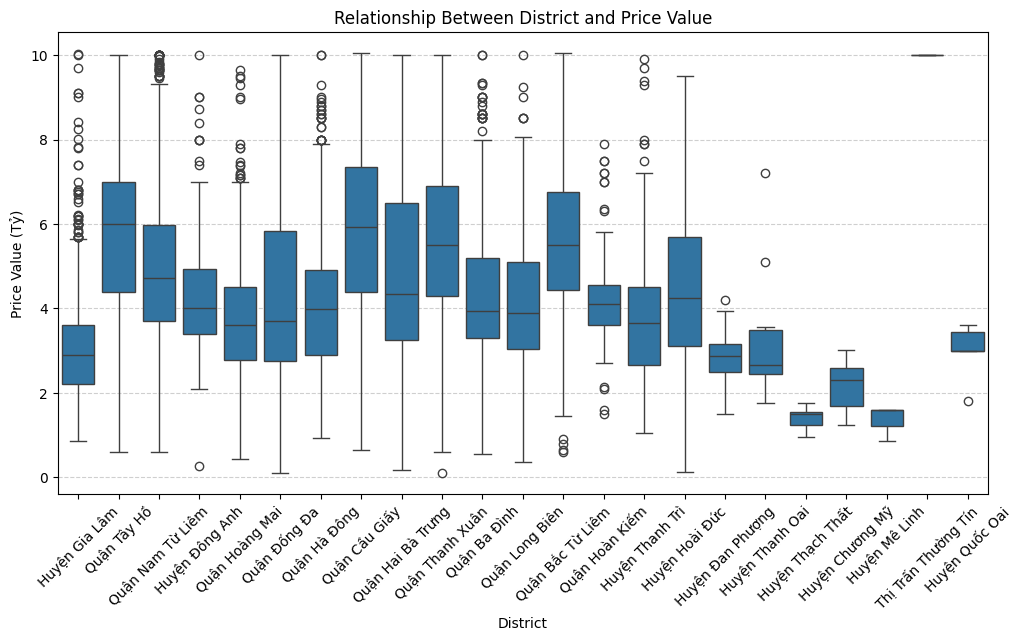

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='District', y='price_value')
plt.title('Relationship Between District and Price Value')
plt.xlabel('District')
plt.ylabel('Price Value (Tỷ)')
plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [78]:
# Apply the function to remove outliers for each District
df_no_outliers = df_no_outliers.groupby('District').apply(remove_outliers, column='price_value').reset_index(drop=True)

C:\Users\FPT Shop\AppData\Local\Temp\ipykernel_11108\1874865893.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df_no_outliers.groupby('District').apply(remove_outliers, column='price_value').reset_index(drop=True)


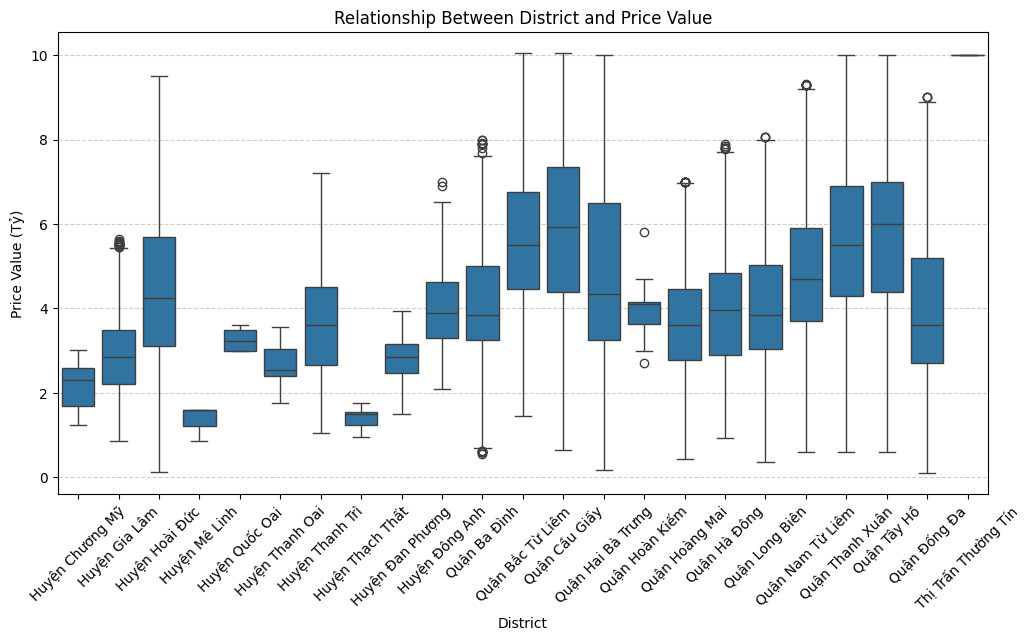

In [79]:
df_no_outliers_dis = df_no_outliers[~((df_no_outliers['District'] == 'Quận Đống Đa') & (df_no_outliers['price_value'] > 9))]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers_dis, x='District', y='price_value')
plt.title('Relationship Between District and Price Value')
plt.xlabel('District')
plt.ylabel('Price Value (Tỷ)')
plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### phapLy

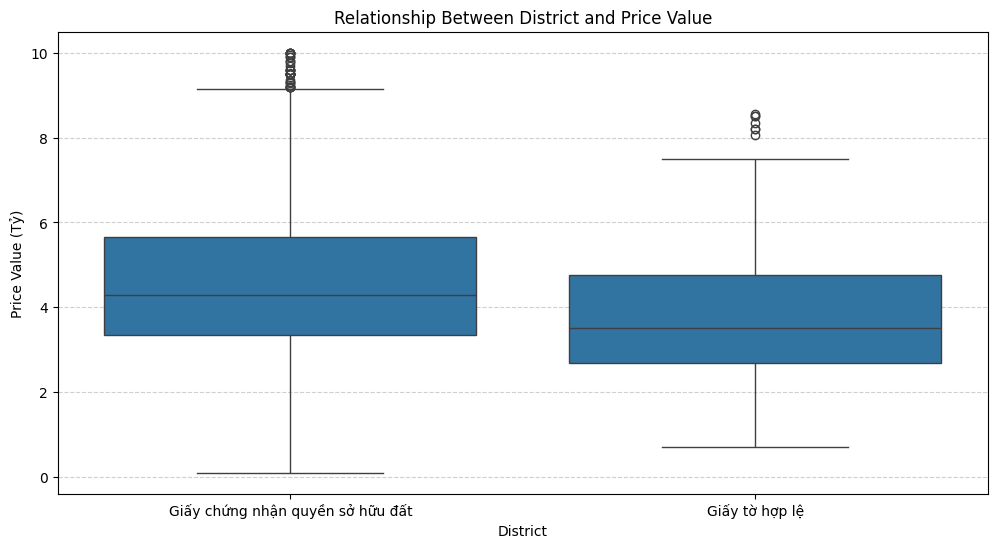

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='phapLy', y='price_value')
plt.title('Relationship Between District and Price Value')
plt.xlabel('District')
plt.ylabel('Price Value (Tỷ)')
#plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [81]:
df_no_rm_pl = df_no_outliers.groupby('phapLy').apply(remove_outliers, column='price_value').reset_index(drop=True)

C:\Users\FPT Shop\AppData\Local\Temp\ipykernel_11108\4013319047.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_rm_pl = df_no_outliers.groupby('phapLy').apply(remove_outliers, column='price_value').reset_index(drop=True)


In [82]:
df_no_rm_pl.shape[0]

3945

In [83]:
filtered_samples = df_no_outliers[~((df_no_outliers['phapLy'] == 'Giấy chứng nhận quyền sở hữu đất') & (df_no_outliers['price_value'] > 9.2))]

# Count the number of samples
count_samples = filtered_samples.shape[0]
print(count_samples)

18373


In [84]:
filtered_samples = filtered_samples[~((filtered_samples['phapLy'] == 'Giấy tờ hợp lệ') & (filtered_samples['price_value'] > 8))]

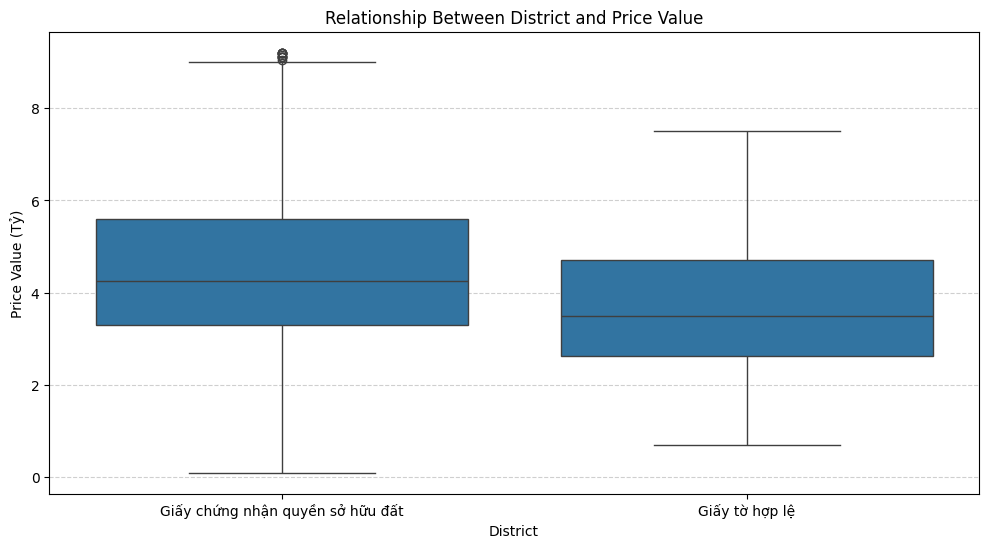

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_samples, x='phapLy', y='price_value')
plt.title('Relationship Between District and Price Value')
plt.xlabel('District')
plt.ylabel('Price Value (Tỷ)')
#plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [86]:
filtered_samples.shape[0]

18366

In [87]:
df_no_outliers = df_no_outliers[~((df_no_outliers['phapLy'] == 'Giấy chứng nhận quyền sở hữu đất') & (df_no_outliers['price_value'] > 9.2))]
df_no_outliers = df_no_outliers[~((df_no_outliers['phapLy'] == 'Giấy tờ hợp lệ') & (df_no_outliers['price_value'] > 8))]

### add price_per_value feature 

In [88]:
df_no_outliers['price_value_mil'] = df_no_outliers['price_value'] * 1000
df_no_outliers['price_per_area'] = df_no_outliers['price_value_mil'] / df_no_outliers['acreage_value']

In [89]:
df_no_outliers.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,acreage_value,price_value,noBathroom,price_value_mil,price_per_area
0,NaN,NaN,NaN,NaN,NaN,Đường 6 Xã Thụy Hương,NaN,Huyện Chương Mỹ,108.0,3.02,NaN,3020.0,27.962963
1,NaN,NaN,NaN,NaN,NaN,Đường Hồ Chí Minh,Xã Thuỷ Xuân Tiên,Huyện Chương Mỹ,61.0,1.25,NaN,1250.0,20.491803
2,NaN,NaN,NaN,NaN,NaN,NaN,Xã Thụy Hương,Huyện Chương Mỹ,32.0,2.60,NaN,2600.0,81.250000
3,Lộc Ninh Singashine,NaN,NaN,2.0,NaN,NaN,NaN,Huyện Chương Mỹ,49.0,1.68,1.0,1680.0,34.285714
4,Lộc Ninh Singashine,Bắc,NaN,3.0,NaN,NaN,NaN,Huyện Chương Mỹ,69.0,2.30,2.0,2300.0,33.333333


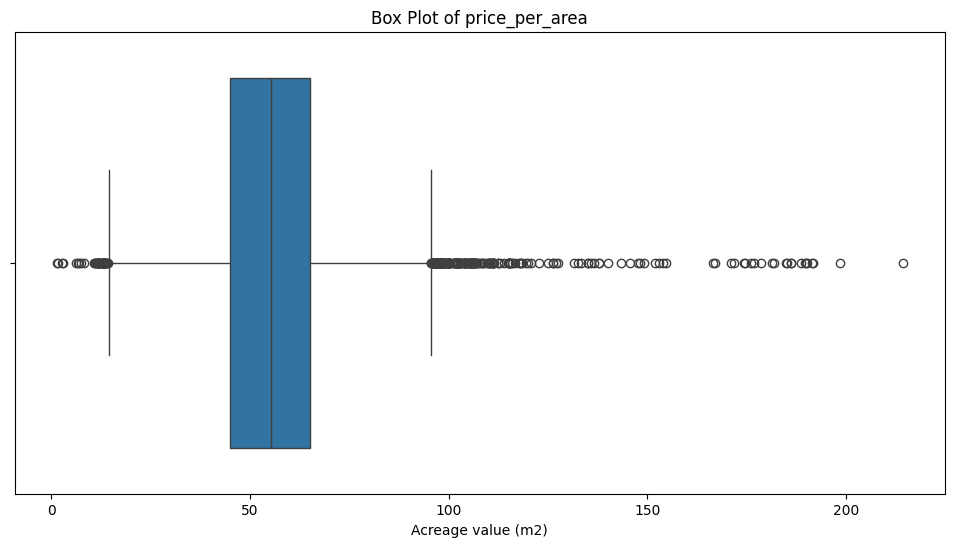

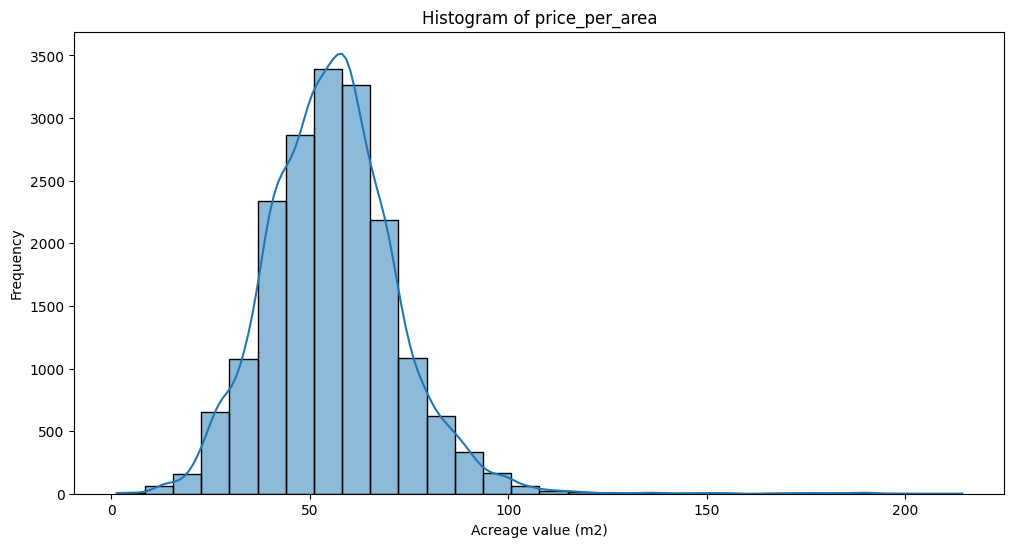

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='price_per_area')
plt.title('Box Plot of price_per_area')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='price_per_area', kde=True, bins=30)
plt.title('Histogram of price_per_area')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

In [91]:
Q1_a = df_no_outliers['price_per_area'].quantile(0.25)  # First quartile (25th percentile)
Q3_a = df_no_outliers['price_per_area'].quantile(0.75)  # Third quartile (75th percentile)
IQR_a = Q3_a - Q1_a                          # Interquartile range

# Define the lower and upper bounds
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

print(lower_bound_a, upper_bound_a)

14.505068574836006 95.4830053667263


In [92]:
filtered_df = df_no_outliers[(df_no_outliers['price_per_area'] > 115) | (df_no_outliers['price_per_area'] < 11)]

# Display the filtered DataFrame
print(filtered_df['price_per_area'].shape[0])
print(filtered_df['price_per_area'])

75
1021       2.636364
1042       1.746269
1048       2.985075
1259      10.625000
1260     120.000000
            ...    
18299    181.282051
18312    131.578947
18322    115.217391
18402    135.135135
18404    135.135135
Name: price_per_area, Length: 75, dtype: float64


In [93]:
df_no_outliers = df_no_outliers[(df_no_outliers['price_per_area'] >= lower_bound_a) & (df_no_outliers['price_per_area'] <= upper_bound_a)]

In [94]:
df_no_outliers = df_no_outliers.drop(columns=['price_value_mil'])

In [95]:
df_no_outliers = df_no_outliers.groupby('noBed').apply(remove_outliers, column='price_value').reset_index(drop=True)

C:\Users\FPT Shop\AppData\Local\Temp\ipykernel_11108\3019368654.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df_no_outliers.groupby('noBed').apply(remove_outliers, column='price_value').reset_index(drop=True)


## Summary
Raw data samples: 24942 <br />
After removing outliers: 16914 <br />

In [96]:
df_no_outliers.shape[0]

16914

In [97]:
df_no_outliers.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,acreage_value,price_value,noBathroom,price_per_area
0,Vinhomes Ocean Park,NaN,Giấy chứng nhận quyền sở hữu đất,1.0,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,47.0,2.10,NaN,44.680851
1,Vinhomes Ocean Park,NaN,Giấy chứng nhận quyền sở hữu đất,1.0,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,31.0,1.59,NaN,51.290323
2,The Pavilion,NaN,NaN,1.0,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,47.0,1.85,NaN,39.361702
3,Masteri Waterfront,NaN,NaN,1.0,NaN,NaN,NaN,Huyện Gia Lâm,48.0,3.30,NaN,68.750000
4,The Zenpark,NaN,NaN,1.0,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,41.0,1.78,NaN,43.414634


In [98]:
df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
noBed,16914.0,2.430176,0.627332,1.000000,2.00000,2.00,3.000000,5.000000
soLau,3924.0,8.470693,8.432389,1.000000,1.00000,5.00,14.000000,36.000000
acreage_value,16914.0,85.055753,25.708167,20.000000,67.00000,81.00,101.000000,156.000000
price_value,16914.0,4.656632,1.824277,0.550000,3.30000,4.42,5.900000,10.050000
noBathroom,9694.0,1.890035,0.416415,1.000000,2.00000,2.00,2.000000,3.000000
price_per_area,16914.0,54.871537,14.585856,14.545455,44.53125,55.00,64.516129,95.454545


In [99]:
null_values_per_feature = df_no_outliers.isnull().sum()

# Display the result
print("Number of null values for each feature:")
print(null_values_per_feature)

Number of null values for each feature:
duAn               5877
huong             15559
phapLy            13293
noBed                 0
soLau             12990
Street             5550
Precinct           3022
District              0
acreage_value         0
price_value           0
noBathroom         7220
price_per_area        0
dtype: int64


## Categorical features


### duAn

In [100]:
duAn_counts = df_no_outliers['duAn'].value_counts().reset_index()
duAn_counts.columns = ['duAn', 'Frequency']
duAn_counts['Percentage'] = (duAn_counts['Frequency'] / len(df)) * 100

# Display the result
print(duAn_counts)

                                     duAn  Frequency  Percentage
0             Vinhomes Ocean Park Gia Lâm        349    1.399246
1                     Vinhomes Smart City        188    0.753749
2                           Goldmark City        140    0.561302
3                         Ecolife Capitol        125    0.501163
4                    Trung Hòa Nhân Chính        119    0.477107
..                                    ...        ...         ...
813  Nhà ở xã hội Kiến Hưng - Lucky House          1    0.004009
814            Khu đô thị ParkCity Hà Nội          1    0.004009
815                        Sun Grand City          1    0.004009
816                               Phố 8/3          1    0.004009
817                     B4 - B14 Kim Liên          1    0.004009

[818 rows x 3 columns]


### huong

In [101]:
huong_counts = df_no_outliers['huong'].value_counts().reset_index()
huong_counts.columns = ['huong', 'Frequency']
huong_counts['Percentage'] = (huong_counts['Frequency'] / len(df)) * 100

# Display the result
print(huong_counts)

      huong  Frequency  Percentage
0       Nam        299    1.198781
1      Đông        267    1.070484
2       Tây        238    0.954214
3       Bắc        234    0.938177
4  Đông Nam        157    0.629460
5  Đông Bắc         57    0.228530
6   Tây Bắc         56    0.224521
7   Tây Nam         47    0.188437


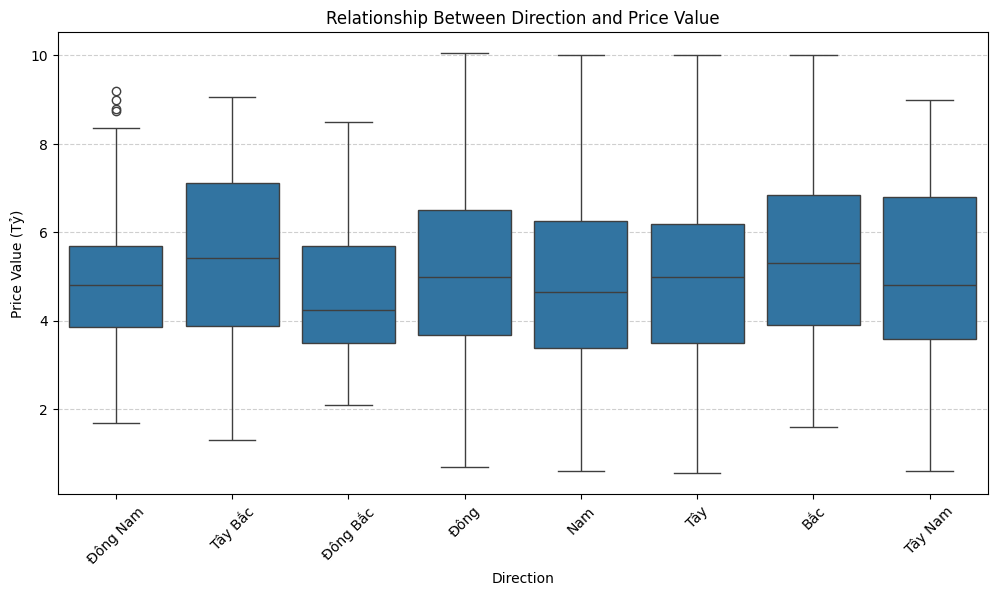

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='huong', y='price_value')
plt.title('Relationship Between Direction and Price Value')
plt.xlabel('Direction')
plt.ylabel('Price Value (Tỷ)')
plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Street

In [103]:
Street_counts = df_no_outliers['Street'].value_counts().reset_index()
Street_counts.columns = ['Street', 'Frequency']
Street_counts['Percentage'] = (Street_counts['Frequency'] / len(df)) * 100

# Display the result
print(Street_counts)

                    Street  Frequency  Percentage
0             Đường Tố Hữu        943    3.780771
1      Đường Phạm Văn Đồng        296    1.186753
2          Đường Phạm Hùng        287    1.150670
3       Đường Lê Văn Lương        240    0.962232
4        Đường Nguyễn Trãi        234    0.938177
..                     ...        ...         ...
575  Đường Nguyễn Thái Học          1    0.004009
576    Đường Bùi Thiện Ngộ          1    0.004009
577      Đường Quyết Thắng          1    0.004009
578        Đường An Hưng 3          1    0.004009
579        Đường Quốc lộ 6          1    0.004009

[580 rows x 3 columns]


### Precinct

In [104]:
Precinct_counts = df_no_outliers['Precinct'].value_counts().reset_index()
Precinct_counts.columns = ['Precinct', 'Frequency']
Precinct_counts['Percentage'] = (Precinct_counts['Frequency'] / len(df)) * 100

# Display the result
print(Precinct_counts)

               Precinct  Frequency  Percentage
0      Phường Mỹ Đình 2        641    2.569962
1     Phường Hoàng Liệt        537    2.152995
2         Phường Tây Mỗ        532    2.132948
3      Phường Trung Hòa        531    2.128939
4      Phường Trung Văn        526    2.108893
..                  ...        ...         ...
186  Phường Thanh Lương          1    0.004009
187  Phường quang trung          1    0.004009
188     Phường Nhật Tân          1    0.004009
189      Phường Láng Hạ          1    0.004009
190     Phường Liên Mạc          1    0.004009

[191 rows x 3 columns]


### phapLy

In [105]:
phapLy_counts = df_no_outliers['phapLy'].value_counts().reset_index()
phapLy_counts.columns = ['phapLy', 'Frequency']
phapLy_counts['Percentage'] = (District_counts['Frequency'] / len(df)) * 100

# Display the result
print(phapLy_counts)

                             phapLy  Frequency  Percentage
0  Giấy chứng nhận quyền sở hữu đất       3461   20.238954
1                    Giấy tờ hợp lệ        160   12.725523


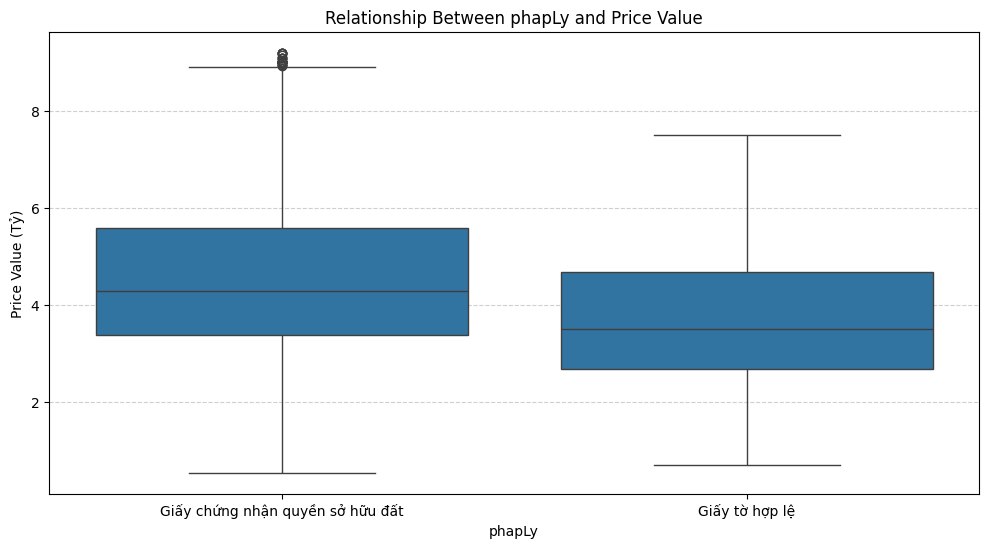

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='phapLy', y='price_value')
plt.title('Relationship Between phapLy and Price Value')
plt.xlabel('phapLy')
plt.ylabel('Price Value (Tỷ)')
plt.xticks()  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### District

In [107]:
District_counts = df_no_outliers['District'].value_counts().reset_index()
District_counts.columns = ['District', 'Frequency']
District_counts['Percentage'] = (District_counts['Frequency'] / len(df)) * 100

# Display the result
print(District_counts)

             District  Frequency  Percentage
0    Quận Nam Từ Liêm       3717   14.902574
1       Quận Cầu Giấy       2169    8.696175
2        Quận Hà Đông       2145    8.599952
3      Quận Hoàng Mai       1918    7.689840
4     Quận Thanh Xuân       1704    6.831850
5    Quận Bắc Từ Liêm        998    4.001283
6       Huyện Gia Lâm        810    3.247534
7      Quận Long Biên        790    3.167348
8        Quận Đống Đa        717    2.874669
9   Quận Hai Bà Trưng        561    2.249218
10        Quận Tây Hồ        340    1.363163
11    Huyện Thanh Trì        317    1.270949
12       Quận Ba Đình        271    1.086521
13     Huyện Hoài Đức        260    1.042418
14     Huyện Đông Anh         93    0.372865
15   Huyện Đan Phượng         40    0.160372
16     Quận Hoàn Kiếm         35    0.140326
17   Huyện Thạch Thất         18    0.072167
18    Huyện Thanh Oai          8    0.032074
19    Huyện Chương Mỹ          2    0.008019
20      Huyện Mê Linh          1    0.004009


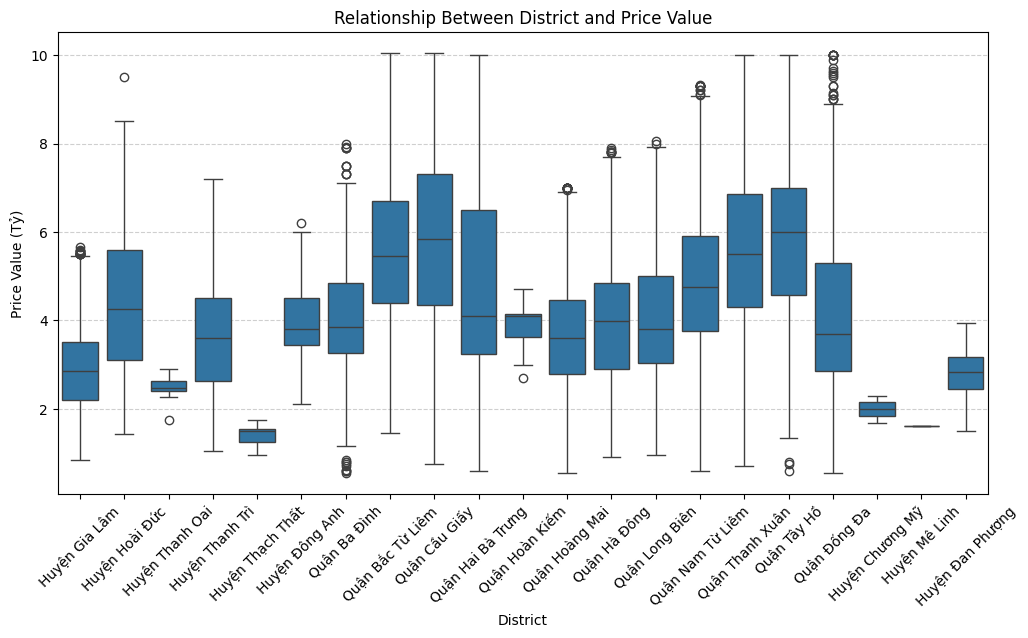

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='District', y='price_value')
plt.title('Relationship Between District and Price Value')
plt.xlabel('District')
plt.ylabel('Price Value (Tỷ)')
plt.xticks(rotation=45)  # Rotate District labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Numerical features


### noBed

In [109]:
bed_counts = df_no_outliers['noBed'].value_counts().reset_index()
bed_counts.columns = ['noBed', 'Frequency']
bed_counts['Percentage'] = (bed_counts['Frequency'] / len(df)) * 100

# Display the result
print(bed_counts)

   noBed  Frequency  Percentage
0    2.0       8261   33.120840
1    3.0       7418   29.740999
2    1.0        874    3.504130
3    4.0        351    1.407265
4    5.0         10    0.040093


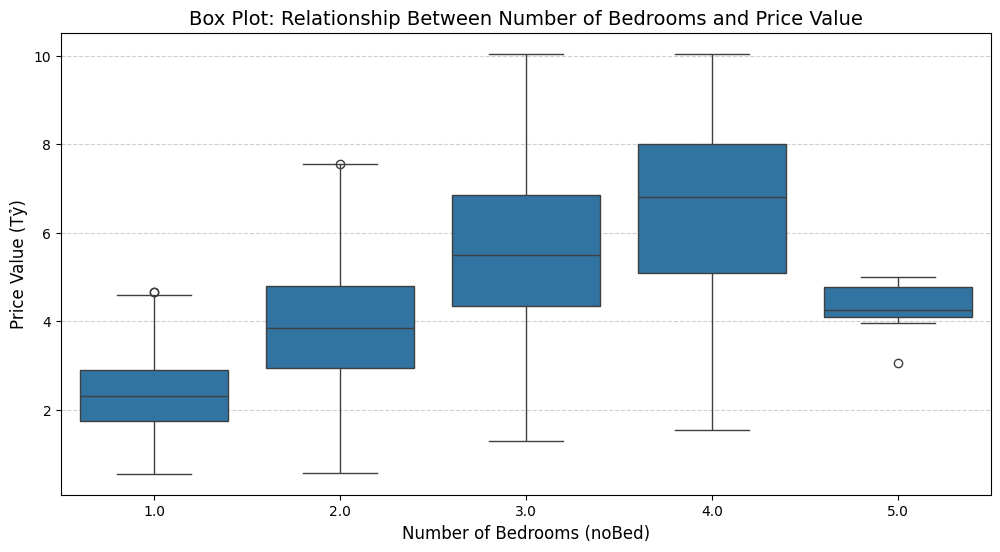

In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='noBed', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Bedrooms and Price Value', fontsize=14)
plt.xlabel('Number of Bedrooms (noBed)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### soLau

In [111]:
soLau_counts = df_no_outliers['soLau'].value_counts().reset_index()
soLau_counts.columns = ['soLau', 'Frequency']
soLau_counts['Percentage'] = (soLau_counts['Frequency'] / len(df)) * 100

# Display the result
print(soLau_counts)

    soLau  Frequency  Percentage
0     1.0       1250    5.011627
1    10.0        237    0.950204
2     2.0        209    0.837944
3     5.0        207    0.829925
4     3.0        197    0.789832
5    15.0        173    0.693609
6     8.0        160    0.641488
7    12.0        154    0.617432
8    20.0        141    0.565312
9     4.0        139    0.557293
10    6.0        121    0.485125
11   16.0        103    0.412958
12    7.0         81    0.324753
13    9.0         80    0.320744
14   18.0         76    0.304707
15   25.0         65    0.260605
16   11.0         59    0.236549
17   30.0         52    0.208484
18   19.0         48    0.192446
19   21.0         44    0.176409
20   17.0         43    0.172400
21   14.0         35    0.140326
22   22.0         32    0.128298
23   27.0         28    0.112260
24   13.0         26    0.104242
25   24.0         26    0.104242
26   23.0         20    0.080186
27   35.0         17    0.068158
28   32.0         17    0.068158
29   26.0 

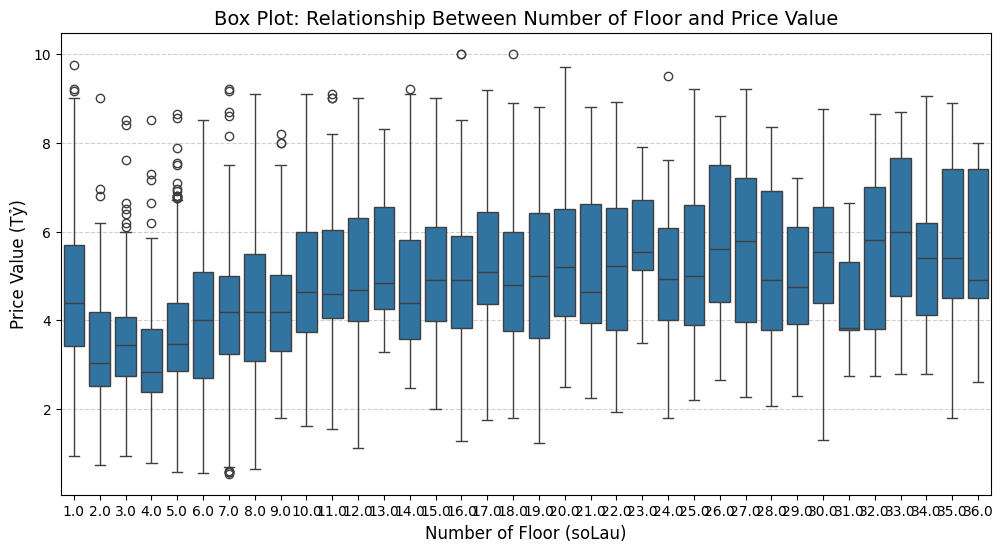

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='soLau', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Floor and Price Value', fontsize=14)
plt.xlabel('Number of Floor (soLau)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### noBathroom

In [113]:
noBathroom_counts = df_no_outliers['noBathroom'].value_counts().reset_index()
noBathroom_counts.columns = ['noBathroom', 'Frequency']
noBathroom_counts['Percentage'] = (noBathroom_counts['Frequency'] / len(df)) * 100

# Display the result
print(noBathroom_counts)

   noBathroom  Frequency  Percentage
0         2.0       7896   31.657445
1         1.0       1432    5.741320
2         3.0        366    1.467404


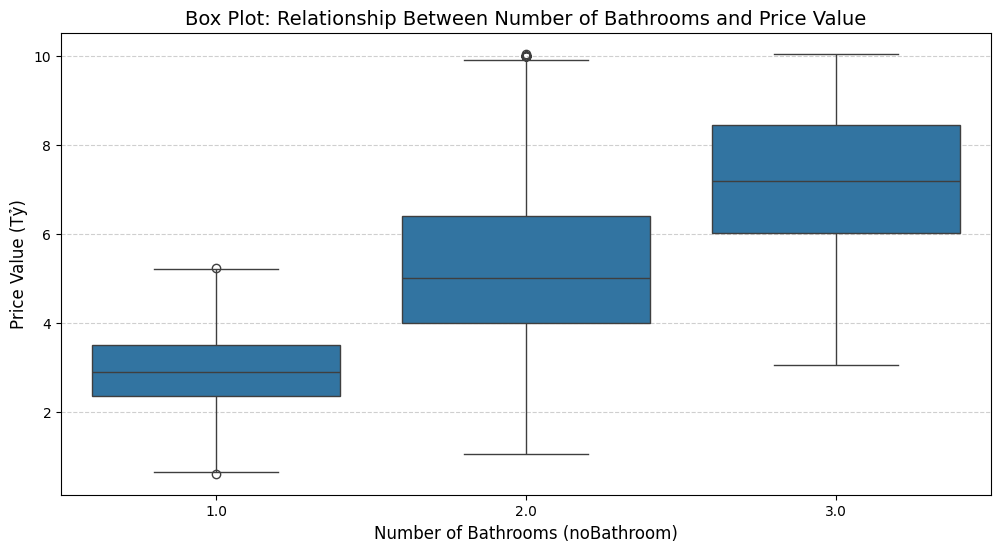

In [114]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='noBathroom', y='price_value')

# Add titles and labels
plt.title('Box Plot: Relationship Between Number of Bathrooms and Price Value', fontsize=14)
plt.xlabel('Number of Bathrooms (noBathroom)', fontsize=12)
plt.ylabel('Price Value (Tỷ)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### price_per_area

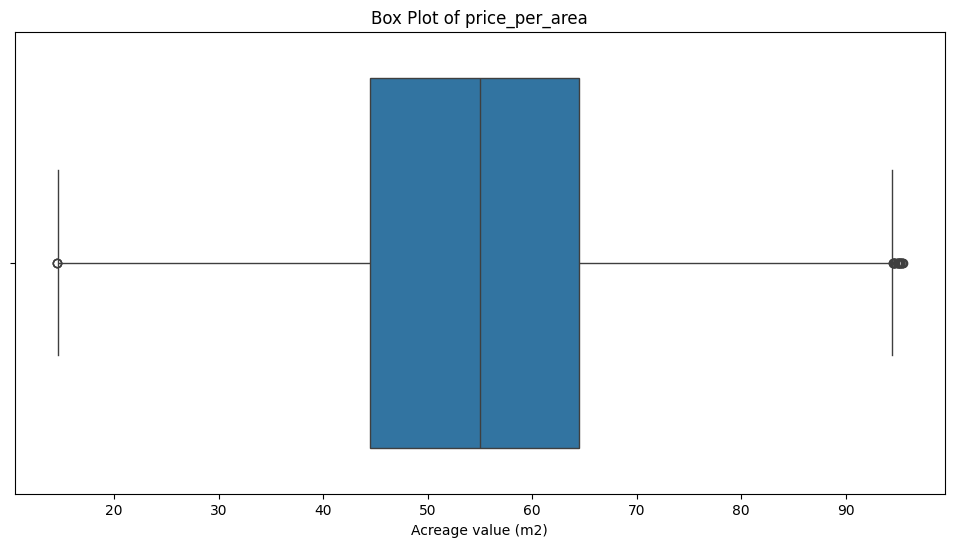

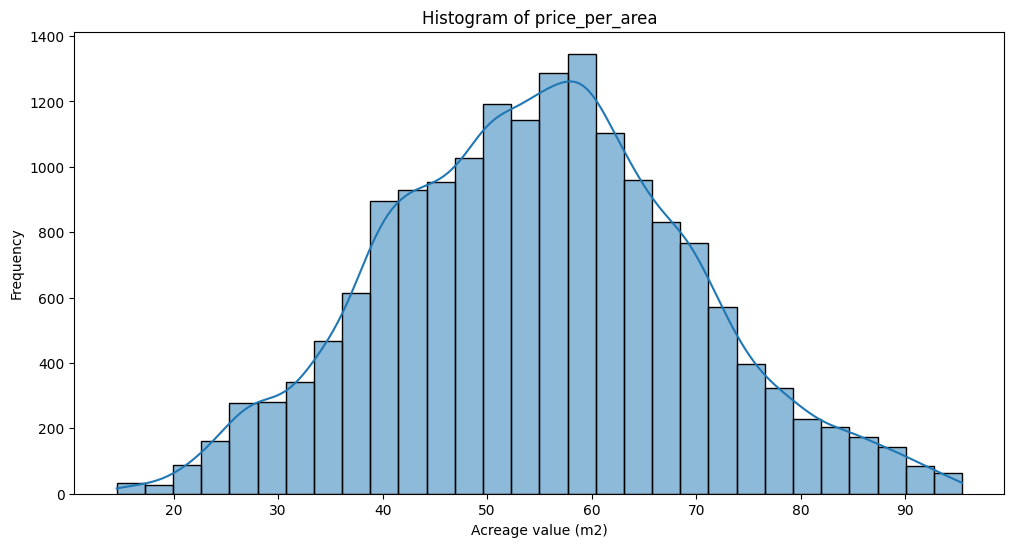

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='price_per_area')
plt.title('Box Plot of price_per_area')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='price_per_area', kde=True, bins=30)
plt.title('Histogram of price_per_area')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

### price_value

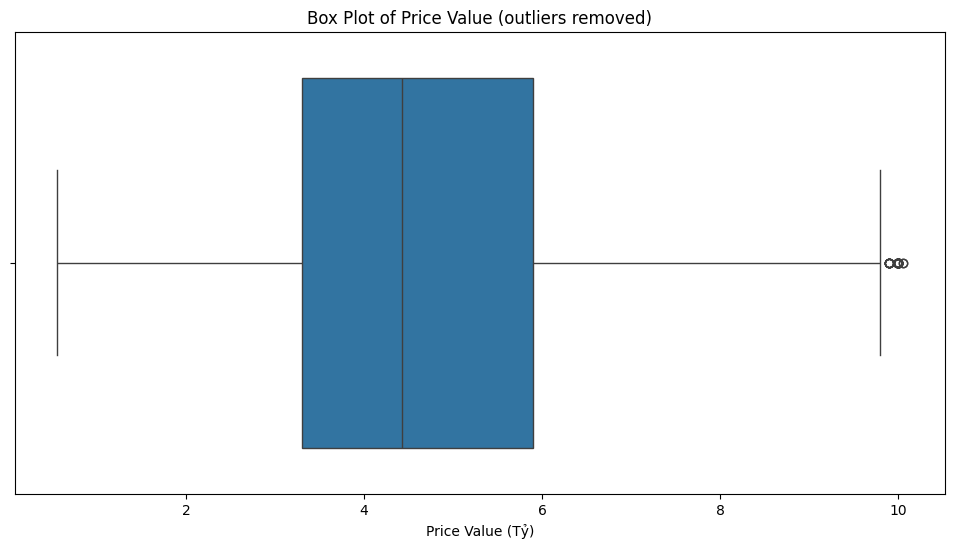

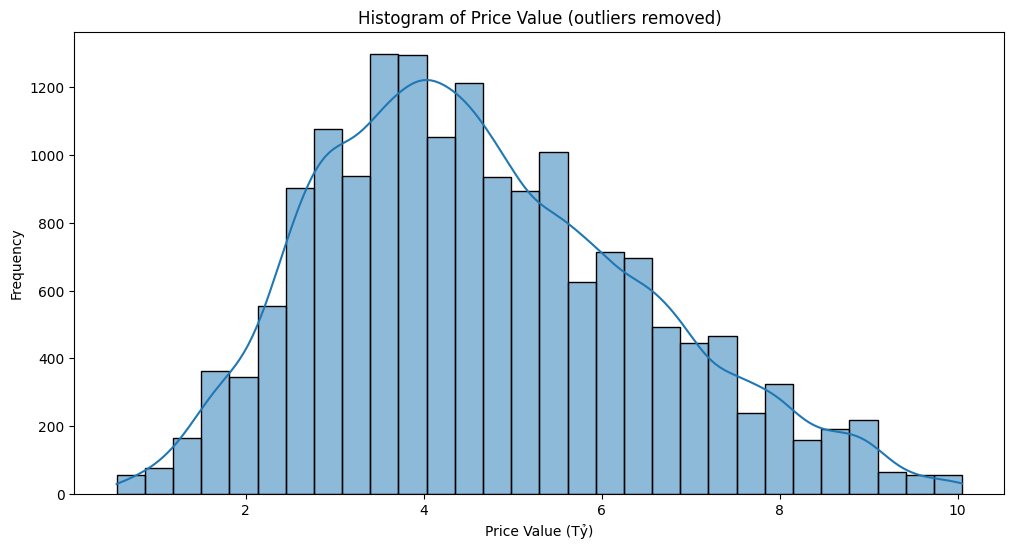

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='price_value')
plt.title('Box Plot of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='price_value', kde=True, bins=30)
plt.title('Histogram of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.ylabel('Frequency')
plt.show()

### acreage_value

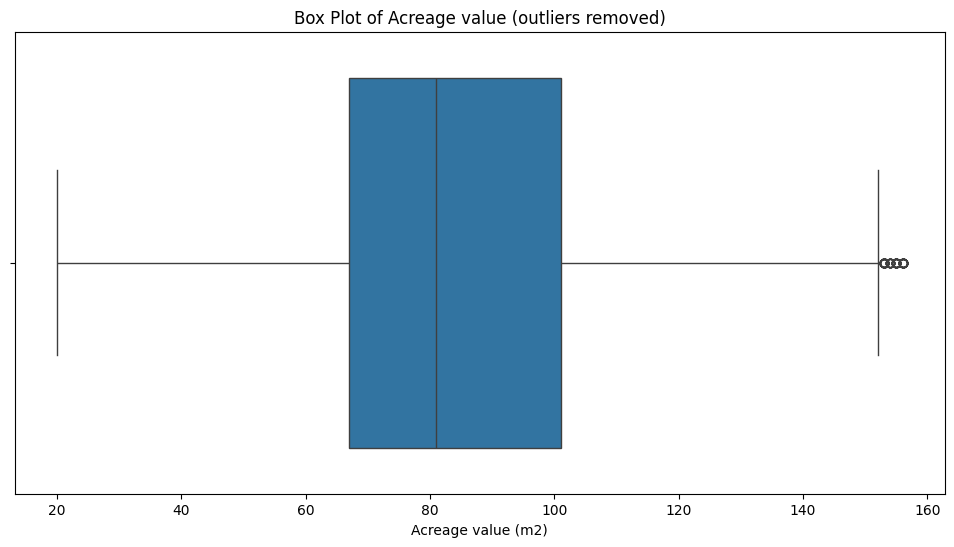

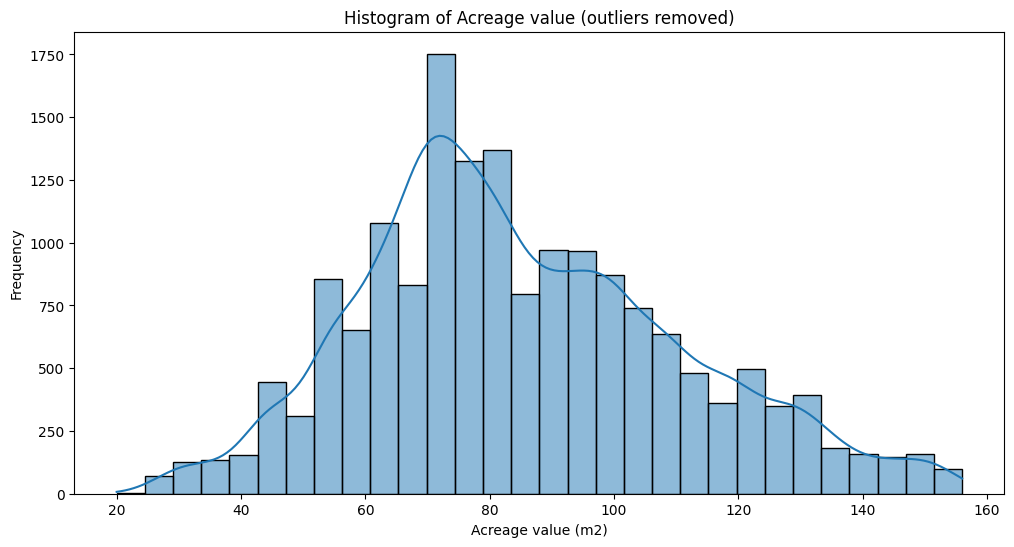

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='acreage_value')
plt.title('Box Plot of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='acreage_value', kde=True, bins=30)
plt.title('Histogram of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

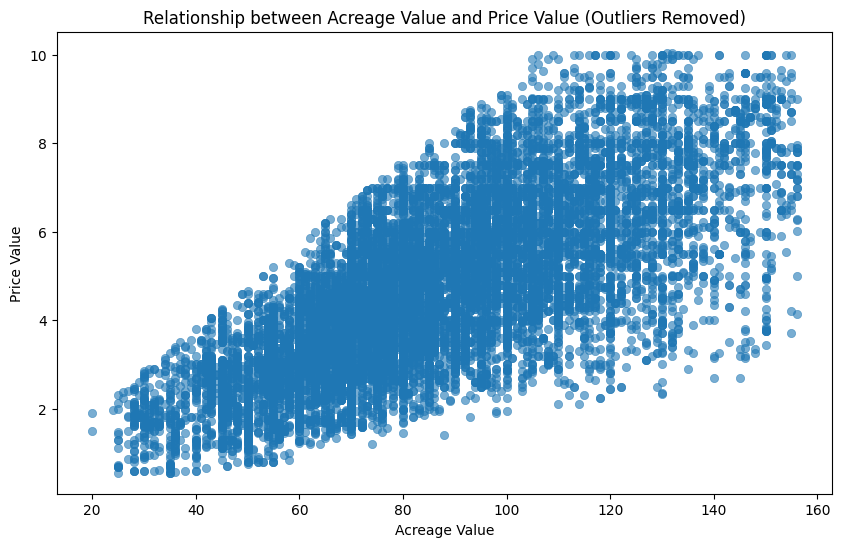

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

### Save dataset

In [119]:
df_no_outliers.to_csv('..\\..\\data\\normalized\\clean_dataset4.csv', index = False)

## processing duAn

In [120]:
unique_duan_values = df_no_outliers['duAn'].unique()
unique_duan_values

array(['Vinhomes Ocean Park', 'The Pavilion', 'Masteri Waterfront',
       'The Zenpark', 'The Zurich', nan, 'Vinhomes Ocean Park Gia Lâm',
       'Masteri Water Front', 'The London - Vinhomes Ocean Park',
       'The Pavilion - Vinhomes Ocean Park',
       'The Zurich - Vinhomes Ocean Park',
       'The Beverly - Vinhomes Ocean Park', 'Chung cư The Senique Hanoi',
       'Đặng Xá 1', 'THT New City', 'Eco Dream', 'Chung cư Đại Thanh',
       'Đại Thanh', 'Phenikaa Hòa Lạc', 'Vinhomes Cổ Loa',
       'Đường Giang Văn Minh', 'Lancaster Hà Nội', 'Discovery Central',
       'The Link Ciputra', 'Sunshine City',
       "Vinhomes D' Capitale\u200e Trần Duy Hưng", 'Đường Trần Thái Tông',
       "Vinhomes D'Capitale", 'A10-A14 Nam Trung Yên', 'Watermark Tây Hồ',
       'Chung cư 30T Nam Trung Yên', 'Quận Hai Bà Trưng', 'Phố 8/3',
       'Sunshine Garden', 'Times City - Park Hill', 'Times City',
       'Pacific Place', 'Đường Giải Phóng', 'Quận Hoàng Mai',
       'Khu đô thị Kim Văn Kim Lũ', 'Đư

### to do: handle duAn and missing values